In [2]:
pip install pyod

     |████████████████████████████████| 134 kB 14.0 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.4-py3-none-any.whl size=165073 sha256=93198a6042e2fe15ce36d2abd7eab1107823dd9662ffbc64c51f0f74a045dac0
  Stored in directory: /home/jovyan/.cache/pip/wheels/fc/79/7a/f4443a9d3209406615b5b817e5d36387588d1d7258aa92891a
Successfully built pyod
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn import metrics
import gc
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
import seaborn as sns
sns.set()
from pylab import rcParams
import pickle
from sklearn import metrics
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from pyod.models.iforest import IForest
from pyod.utils.example import visualize
import warnings
import matplotlib.font_manager
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Dataset.csv', sep=',')
data.head(10)

tx_hash  indegree  outdegree  \
0  0437cd7f8525ceed2324359c2d0ba26006d92d856a9c20...         0          1   
1  f4184fc596403b9d638783cf57adfe4c75c605f6356fbc...         1          2   
2  ea44e97271691990157559d0bdd9959e02790c34db6c00...         1          1   
3  a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...         1          1   
4  591e91f809d716912ca1d4a9295e70c3e78bab077683f7...         1          2   
5  298ca2045d174f8a158961806ffc4ef96fad02d71a6b84...         1          0   
6  12b5633bad1f9c167d523ad1aa1947b2732a865bf5414e...         1          2   
7  4385fcf8b14497d0659adccfe06ae7e38e0b5dc95ff8a1...         1          1   
8  828ef3b079f9c23829c56fe86e85b4a69d9e06e5b54ea5...         1          1   
9  a3b0e9e7cddbbe78270fa4182a7675ff00b92872d8df7d...         3          0   

   in_btc  out_btc  total_btc  mean_in_btc  mean_out_btc  in_malicious  \
0     0.0     50.0       50.0     0.000000          50.0             0   
1    50.0     50.0      100.0    50.000000          25.0             0   
2    10.0     10.0       20.0    10.000000          10.0             0   
3    40.0     30.0       70.0    40.000000          30.0             0   
4    30.0     30.0       60.0    30.000000          15.0             0   
5     1.0      0.0        1.0     1.000000           0.0             0   
6    29.0     29.0       58.0    29.000000          14.5             0   
7     1.0      1.0        2.0     1.000000           1.0             0   
8    28.0     10.0       38.0    28.000000          10.0             0   
9    61.0      0.0       61.0    20.333333           0.0             0   

   out_malicious  is_malicious  out_and_tx_malicious  all_malicious  
0              0             0                     0              0  
1              0             0                     0              0  
2              0             0                     0              0  
3              0             0                     0              0  
4              0             0                     0              0  
5              0             0                     0              0  
6              0             0                     0              0  
7              0             0                     0              0  
8              0             0                     0              0  
9              0             0                     0              0

In [3]:
data.drop('tx_hash', axis=1, inplace=True)
data.drop('in_malicious', axis=1, inplace=True)
data.drop('out_malicious', axis=1, inplace=True)
data.drop('is_malicious', axis=1, inplace=True)
data.drop('all_malicious', axis=1, inplace=True)

data.describe()

indegree     outdegree        in_btc       out_btc     total_btc  \
count  3.024813e+07  3.024813e+07  3.024813e+07  3.024813e+07  3.024813e+07   
mean   2.148699e+00  2.148699e+00  5.484150e+01  5.484150e+01  1.096830e+02   
std    7.421447e+00  4.512048e+00  1.303303e+03  1.301473e+03  2.602527e+03   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.000000e+00  2.000000e+00  1.000000e-01  9.950000e-02  2.058720e-01   
50%    1.000000e+00  2.000000e+00  9.325000e-01  9.590000e-01  1.964759e+00   
75%    2.000000e+00  2.000000e+00  8.591912e+00  9.063657e+00  1.840000e+01   
max    1.932000e+03  1.322000e+03  5.500000e+05  5.000207e+05  1.050000e+06   

        mean_in_btc  mean_out_btc  out_and_tx_malicious  
count  3.024813e+07  3.024813e+07          3.024813e+07  
mean   4.923980e+01  2.877087e+01          3.570468e-06  
std    9.729210e+02  7.125567e+02          1.889565e-03  
min    0.000000e+00  0.000000e+00          0.000000e+00  
25%    6.400000e-02  5.025776e-02          0.000000e+00  
50%    5.350261e-01  4.900000e-01          0.000000e+00  
75%    5.614287e+00  4.519481e+00          0.000000e+00  
max    4.992596e+05  5.000000e+05          1.000000e+00

In [4]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(data['out_and_tx_malicious'].value_counts()[0]/len(data) * 100,5), '% of the dataset')
print('Frauds', round(data['out_and_tx_malicious'].value_counts()[1]/len(data) * 100,5), '% of the dataset')

No Frauds 99.99964 % of the dataset
Frauds 0.00036 % of the dataset


In [5]:
data['out_and_tx_malicious'].value_counts()

0    30248026
1         108
Name: out_and_tx_malicious, dtype: int64

Scale Transform

In [6]:
# Log scale to normalize the data
sc_data = data.copy()

sc_data['indegree'] = np.log1p(sc_data['indegree'])
sc_data['outdegree']= np.log1p(sc_data['outdegree'])
sc_data['in_btc'] = np.log1p(sc_data['in_btc'])
sc_data['out_btc']= np.log1p(sc_data['out_btc'])
sc_data['total_btc']= np.log1p(sc_data['total_btc'])
sc_data['mean_in_btc']= np.log1p(sc_data['mean_in_btc'])
sc_data['mean_out_btc']= np.log1p(sc_data['mean_out_btc'])

# RobustScaler is less prone to outliers.

scaler = RobustScaler()

sc_data['indegree'] = scaler.fit_transform(sc_data['indegree'].values.reshape(-1,1))
sc_data['outdegree'] = scaler.fit_transform(sc_data['outdegree'].values.reshape(-1,1))
sc_data['in_btc'] = scaler.fit_transform(sc_data['in_btc'].values.reshape(-1,1))
sc_data['out_btc'] = scaler.fit_transform(sc_data['out_btc'].values.reshape(-1,1))
sc_data['total_btc'] = scaler.fit_transform(sc_data['total_btc'].values.reshape(-1,1))
sc_data['mean_in_btc'] = scaler.fit_transform(sc_data['mean_in_btc'].values.reshape(-1,1))
sc_data['mean_out_btc'] = scaler.fit_transform(sc_data['mean_out_btc'].values.reshape(-1,1))

In [ ]:
sc_data.describe()

indegree     outdegree        in_btc       out_btc     total_btc  \
count  3.024813e+07  3.024813e+07  3.024813e+07  3.024813e+07  3.024813e+07   
mean   6.132702e-01 -2.626722e-02  3.117960e-01  3.069471e-01  2.302426e-01   
std    1.137854e+00  2.681126e-01  7.289874e-01  7.166882e-01  6.480901e-01   
min   -1.709511e+00 -1.098612e+00 -3.042166e-01 -3.037088e-01 -3.912052e-01   
25%    0.000000e+00  0.000000e+00 -2.602058e-01 -2.608668e-01 -3.238193e-01   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.000000e+00  0.000000e+00  7.397942e-01  7.391332e-01  6.761807e-01   
max    1.695258e+01  6.089045e+00  5.799225e+00  5.623103e+00  4.599418e+00   

        mean_in_btc  mean_out_btc  out_and_tx_malicious  
count  3.024813e+07  3.024813e+07          3.024813e+07  
mean   4.080517e-01  3.952796e-01          3.570468e-06  
std    8.308393e-01  8.356174e-01          1.889565e-03  
min   -2.345382e-01 -2.403354e-01          0.000000e+00  
25%   -2.005871e-01 -2.107825e-01          0.000000e+00  
50%    0.000000e+00  0.000000e+00          0.000000e+00  
75%    7.994129e-01  7.892175e-01          0.000000e+00  
max    6.946344e+00  7.668286e+00          1.000000e+00

In [ ]:
del data #free memory
gc.collect()

518

Split

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(sc_data.iloc[:,:-1], sc_data['out_and_tx_malicious'], test_size = 0.30, random_state=10)

In [ ]:
pd.value_counts(train_y)

0    21173617
1          76
Name: out_and_tx_malicious, dtype: int64

In [ ]:
pd.value_counts(test_y)

0    9074409
1         32
Name: out_and_tx_malicious, dtype: int64

In [ ]:
del sc_data #free memory
gc.collect()

0

Train Sample

In [16]:


# original_train_df = pd.concat([x_train, y_train], axis=1)
# original_train_normal_df = original_train_df[original_train_df.out_and_tx_malicious == 0]
# original_train_fraud_df = original_train_df[original_train_df.out_and_tx_malicious == 1]

# def get_training_sample(n):
#     normal_sample = original_train_normal_df.sample(n)
#     final_sample = pd.concat([normal_sample, original_train_fraud_df])
#     final_sample = shuffle(final_sample)

#     return final_sample.iloc[:,:-1].values, final_sample.iloc[:,-1].values





data_train = pd.concat([train_x, train_y], axis=1)
nonfraud_train = data_train[data_train.out_and_tx_malicious == 0]
fraud_train = data_train[data_train.out_and_tx_malicious == 1]

def get_training_sample(n):
    non_fraud = nonfraud_train.sample(n)
    trained_data = pd.concat([non_fraud, fraud_train])
    trained_data = shuffle(trained_data)

    return trained_data.iloc[:,:-1].values, trained_data.iloc[:,-1].values

test Sample

In [17]:
# original_test_df = pd.concat([x_test, y_test], axis=1)
# original_test_normal_df = original_test_df[original_test_df.out_and_tx_malicious == 0]
# original_test_fraud_df = original_test_df[original_test_df.out_and_tx_malicious == 1]

# def get_test_sample(n):
#     normal_sample = original_test_normal_df.sample(n)
#     final_sample = pd.concat([normal_sample, original_test_fraud_df])
#     final_sample = shuffle(final_sample)
#     return final_sample.iloc[:,:-1].values, final_sample.iloc[:,-1].values





data_test = pd.concat([test_x, test_y], axis=1)
nonfraud_test = data_test[data_test.out_and_tx_malicious == 0]
fraud_test = data_test[data_test.out_and_tx_malicious == 1]

def get_test_sample(n):
    non_fraud = nonfraud_test.sample(n)
    tested_data = pd.concat([non_fraud, fraud_test])
    tested_data = shuffle(tested_data)
    return tested_data.iloc[:,:-1].values, tested_data.iloc[:,-1].values

Oversampling train data


In [18]:

def oversample_minority_class(X, y, fraction):
    SM = SMOTE(fraction, n_jobs=-1)
    return SM.fit_resample(X, y)

Eval Metrics

In [19]:
# def evaluate(actual, predicted, probability, time_complexity):
#     eval_metric = {}
#     eval_metric['time'] = time_complexity
#     eval_metric['conf_matrix'] = confusion_matrix(actual, predicted)

#     eval_metric['balanced_accuracy'] = round(balanced_accuracy_score(actual, predicted),7)
#     eval_metric['accuracy'] = round(accuracy_score(actual, predicted),7)

#     eval_metric['macro_precision'] = round(precision_score(actual, predicted, average="macro"),7)
#     eval_metric['macro_recall'] = round(recall_score(actual,predicted, average="macro"),7)
#     eval_metric['macro_f1'] = round(f1_score(actual,predicted, average="macro"),7)
#     eval_metric['macro_roc'] = round(roc_auc_score(actual, probability, average="macro"),7)


#     eval_metric['precision'] = round(precision_score(actual, predicted),7)
#     eval_metric['recall'] = round(recall_score(actual,predicted),7)
#     eval_metric['f1'] = round(f1_score(actual,predicted),7)
#     eval_metric['roc'] = round(roc_auc_score(actual, probability),7)

#     false_pos_rate, true_pos_rate, thresholds = roc_curve(actual, probability)
#     eval_metric['false_pos_rate'] = false_pos_rate
#     eval_metric['true_pos_rate'] = true_pos_rate
#     eval_metric['thresholds'] = thresholds

#     precision_rt, recall_rt, threshold_rt = precision_recall_curve(actual, probability)
#     eval_metric['precision_rt'] = precision_rt
#     eval_metric['recall_rt'] = recall_rt
#     eval_metric['threshold_rt'] = threshold_rt
#     return eval_metric










def met_eval(actual, predicted, probability, time_complexity):
    meteval = {}
    meteval['time'] = time_complexity
    meteval['conf_matrix'] = confusion_matrix(actual, predicted)

    meteval['balanced_accuracy'] = round(balanced_accuracy_score(actual, predicted),7)
    meteval['accuracy'] = round(accuracy_score(actual, predicted),7)

    meteval['macro_precision'] = round(precision_score(actual, predicted, average="macro"),7)
    meteval['macro_recall'] = round(recall_score(actual,predicted, average="macro"),7)
    meteval['macro_f1'] = round(f1_score(actual,predicted, average="macro"),7)
    meteval['macro_roc'] = round(roc_auc_score(actual, probability, average="macro"),7)


    meteval['precision'] = round(precision_score(actual, predicted),7)
    meteval['recall'] = round(recall_score(actual,predicted),7)
    meteval['f1'] = round(f1_score(actual,predicted),7)
    meteval['roc'] = round(roc_auc_score(actual, probability),7)

    false_pos_rate, true_pos_rate, thresholds = roc_curve(actual, probability)
    meteval['false_pos_rate'] = false_pos_rate
    meteval['true_pos_rate'] = true_pos_rate
    meteval['thresholds'] = thresholds

    precision_rt, recall_rt, threshold_rt = precision_recall_curve(actual, probability)
    meteval['precision_rt'] = precision_rt
    meteval['recall_rt'] = recall_rt
    meteval['threshold_rt'] = threshold_rt
    return meteval


Fit Model

In [20]:


# iterations = 20
# random_state = 42
# training_sample_size = int(len(y_train) / 10)
# oversampling_fraction = 0.057
# outliers_fraction = oversampling_fraction

# print('Training Parameters:\n====================\n')
# print('Iterations: '+ str(iterations))
# print('Training Sample Size: '+ str(training_sample_size))
# print('Oversampling Fraction: '+ str(oversampling_fraction))
# print('Outliers Fraction: '+ str(outliers_fraction))

# def fit_model(X_train):
#     clf = IForest(n_estimators=40, contamination=outliers_fraction, random_state=random_state, n_jobs=-1)
#     clf.fit(X_train)
#     return clf









iters = 15
rand_state = 42
train_ssize = int(len(train_y) / 10)
sampl_frac = 0.057
out_frac = sampl_frac

print('Training Parameters:\n====================\n')
print('Iterations: '+ str(iters))
print('Training Sample Size: '+ str(train_ssize))
print('Oversampling Fraction: '+ str(sampl_frac))
print('Outliers Fraction: '+ str(out_frac))

def fit_model(train):
    clf = IForest(n_estimators=40, contamination=out_frac, random_state=rand_state, n_jobs=-1)
    clf.fit(train)
    return clf

Training Parameters:

Iterations: 15
Training Sample Size: 2117369
Oversampling Fraction: 0.057
Outliers Fraction: 0.057


Modeling- iterative

In [21]:
# training_evaluations = {}
# test_evaluations = {}
# model = {}


# for i in range(0, iterations):
#     sample_Xtrain, sample_ytrain = get_training_sample(training_sample_size)
#     X_train, y_train = oversample_minority_class(sample_Xtrain, sample_ytrain, oversampling_fraction)
#     print("Iteration "+ str(i+1) + " in progress...")

#     #Modeling
#     start = time.time()
#     clf = fit_model(X_train)
#     end = time.time()
#     # save_model(clf, model_path+'i='+str(i+1)+'.h5')
#     # get the prediction labels and outlier scores of the training data
#     y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
#     y_train_scores = clf.decision_scores_  # raw outlier scores

#     training_time = round(end - start, 4)
#     model[i+1] = clf
#     training_evaluations[i+1] = evaluate(y_train, y_train_pred, y_train_scores, training_time)

#     #     print("Iteration "+ str(i+1)+ " Trained")

#     test_start = time.time()
#     y_test_pred = clf.predict(x_test)
#     y_test_scores = clf.decision_function(x_test)
#     test_end = time.time()
#     testing_time = round(test_end - test_start, 4)
#     test_evaluations[i+1] = evaluate(y_test, y_test_pred, y_test_scores, testing_time)

#     print("Iteration: (" + str((i+1)) + "/" + str(iterations) + ")    Training Time: "+str(training_time)+" seconds     Testing Time: "+ str(testing_time)+ " seconds")

# print("Iterative Modeling Completed!")










eval_train = {}
eval_test = {}
mod = {}


for i in range(0, iters):
    train_samplex, train_sampley = get_training_sample(train_ssize)
    x_train, y_train = oversample_minority_class(train_samplex, train_sampley, sampl_frac)
    print("Iteration "+ str(i+1) + " in progress...")

    #Modeling
    start = time.time()
    clf = fit_model(train_x)
    end = time.time()
    # get the prediction labels and outlier scores of the training data
    pred_trainy = clf.labels_  # binary labels (0: inliers, 1: outliers)
    score_trainy = clf.decision_scores_  # raw outlier scores

    train_time = round(end - start, 4)
    mod[i+1] = clf
    eval_train[i+1] = met_eval(y_train, pred_trainy, score_trainy, train_time)

    print("Iteration "+ str(i+1)+ " Trained")

    test_start = time.time()
    pred_testy = clf.predict(test_x)
    score_testy = clf.decision_function(test_x)
    end_test = time.time()
    time_test = round(end_test - test_start, 4)
    eval_test[i+1] = met_eval(test_y, pred_testy, score_testy, time_test)

    print("Iteration: (" + str((i+1)) + "/" + str(iters) + ")    Training Time: "+str(train_time)+" seconds     Testing Time: "+ str(time_test)+ " seconds")

print("Iterative Modeling Completed!")

Iteration 1 in progress...
Iteration: (1/15)    Training Time: 46.3813 seconds     Testing Time: 193.0468 seconds
Iteration 2 in progress...
Iteration: (2/15)    Training Time: 45.6878 seconds     Testing Time: 201.9968 seconds
Iteration 3 in progress...
Iteration: (3/15)    Training Time: 50.8087 seconds     Testing Time: 191.9422 seconds
Iteration 4 in progress...
Iteration: (4/15)    Training Time: 58.0926 seconds     Testing Time: 200.7274 seconds
Iteration 5 in progress...
Iteration: (5/15)    Training Time: 46.3575 seconds     Testing Time: 184.4038 seconds
Iteration 6 in progress...
Iteration: (6/15)    Training Time: 44.4768 seconds     Testing Time: 191.9377 seconds
Iteration 7 in progress...
Iteration: (7/15)    Training Time: 45.4566 seconds     Testing Time: 215.9037 seconds
Iteration 8 in progress...
Iteration: (8/15)    Training Time: 45.2524 seconds     Testing Time: 191.3501 seconds
Iteration 9 in progress...
Iteration: (9/15)    Training Time: 46.3729 seconds     Testi

Tab Eval

In [22]:
# training_eval_df = pd.DataFrame(columns=['Iteration','Accuracy','Balanced-Accuracy','Macro-Precision','Macro-Recall','Macro-F1','Macro-ROC', 'Precision', 'Recall', 'F1', 'ROC', 'Time'])
# test_eval_df = pd.DataFrame(columns=['Iteration','Accuracy','Balanced-Accuracy','Macro-Precision','Macro-Recall','Macro-F1','Macro-ROC', 'Precision', 'Recall', 'F1', 'ROC', 'Time'])
# for it in list(training_evaluations.keys()):
#     training_eval_df = training_eval_df.append({'Iteration' : str(it),
#                              'Accuracy' : training_evaluations[it]['accuracy'],
#                              'Balanced-Accuracy' : training_evaluations[it]['balanced_accuracy'],
#                              'Macro-Precision' : training_evaluations[it]['macro_precision'],
#                              'Macro-Recall' : training_evaluations[it]['macro_recall'],
#                              'Macro-F1' : training_evaluations[it]['macro_f1'],
#                              'Macro-ROC' : training_evaluations[it]['macro_roc'],
#                              'Precision' : training_evaluations[it]['precision'],
#                              'Recall' : training_evaluations[it]['recall'],
#                              'F1' : training_evaluations[it]['f1'],
#                              'ROC' : training_evaluations[it]['roc'],
#                              'Time' : training_evaluations[it]['time']                                              
#                             }, ignore_index=True)
    
# for it in list(test_evaluations.keys()):
#     test_eval_df = test_eval_df.append({'Iteration' : str(it),
#                              'Accuracy' : test_evaluations[it]['accuracy'],
#                              'Balanced-Accuracy' : test_evaluations[it]['balanced_accuracy'],
#                              'Macro-Precision' : test_evaluations[it]['macro_precision'],
#                              'Macro-Recall' : test_evaluations[it]['macro_recall'],
#                              'Macro-F1' : test_evaluations[it]['macro_f1'],
#                              'Macro-ROC' : test_evaluations[it]['macro_roc'],
#                              'Precision' : test_evaluations[it]['precision'],
#                              'Recall' : test_evaluations[it]['recall'],
#                              'F1' : test_evaluations[it]['f1'],
#                              'ROC' : test_evaluations[it]['roc'],
#                              'Time' : test_evaluations[it]['time']                                              
#                             }, ignore_index=True)
    
    
    
    
    
    
    
    
    
    
    
    
eval_train_data = pd.DataFrame(columns=['Iteration','Accuracy','Balanced-Accuracy','Macro-Precision','Macro-Recall','Macro-F1','Macro-ROC', 'Precision', 'Recall', 'F1', 'ROC', 'Time'])
eval_test_data = pd.DataFrame(columns=['Iteration','Accuracy','Balanced-Accuracy','Macro-Precision','Macro-Recall','Macro-F1','Macro-ROC', 'Precision', 'Recall', 'F1', 'ROC', 'Time'])
for it in list(eval_train.keys()):
    eval_train_data = eval_train_data.append({'Iteration' : str(it),
                                                'Accuracy' : eval_train[it]['accuracy'],
                                                'Balanced-Accuracy' : eval_train[it]['balanced_accuracy'],
                                                'Macro-Precision' : eval_train[it]['macro_precision'],
                                                'Macro-Recall' : eval_train[it]['macro_recall'],
                                                'Macro-F1' : eval_train[it]['macro_f1'],
                                                'Macro-ROC' : eval_train[it]['macro_roc'],
                                                'Precision' : eval_train[it]['precision'],
                                                'Recall' : eval_train[it]['recall'],
                                                'F1' : eval_train[it]['f1'],
                                                'ROC' : eval_train[it]['roc'],
                                                'Time' : eval_train[it]['time']
                                                }, ignore_index=True)

for it in list(eval_test.keys()):
    eval_test_data = eval_test_data.append({'Iteration' : str(it),
                                        'Accuracy' : eval_test[it]['accuracy'],
                                        'Balanced-Accuracy' : eval_test[it]['balanced_accuracy'],
                                        'Macro-Precision' : eval_test[it]['macro_precision'],
                                        'Macro-Recall' : eval_test[it]['macro_recall'],
                                        'Macro-F1' : eval_test[it]['macro_f1'],
                                        'Macro-ROC' : eval_test[it]['macro_roc'],
                                        'Precision' : eval_test[it]['precision'],
                                        'Recall' : eval_test[it]['recall'],
                                        'F1' : eval_test[it]['f1'],
                                        'ROC' : eval_test[it]['roc'],
                                        'Time' : eval_test[it]['time']
                                        }, ignore_index=True)

In [23]:
eval_train_data.sort_values('Macro-F1', ascending=True)

Iteration  Accuracy  Balanced-Accuracy  Macro-Precision  Macro-Recall  \
9         10  0.941122           0.717248         0.712361      0.717248   
1          2  0.940644           0.722582         0.711265      0.722582   
3          4  0.940676           0.722658         0.711402      0.722658   
6          7  0.941075           0.721935         0.712865      0.721935   
12        13  0.941732           0.726189         0.716094      0.726189   
2          3  0.941844           0.728444         0.716842      0.728444   
13        14  0.942049           0.729435         0.717796      0.729435   
8          9  0.942552           0.729193         0.719808      0.729193   
4          5  0.942379           0.730484         0.719261      0.730484   
7          8  0.942522           0.731529         0.719967      0.731529   
14        15  0.942706           0.732685         0.720853      0.732685   
0          1  0.943583           0.736961         0.724931      0.736961   
5          6  0.944058           0.739220         0.727133      0.739220   
10        11  0.944414           0.740166         0.728721      0.740166   
11        12  0.945463           0.742330         0.733414      0.742330   

    Macro-F1  Macro-ROC  Precision    Recall        F1       ROC     Time  
9   0.714771   0.882702   0.455184  0.466310  0.460680  0.882702  51.2598  
1   0.716744   0.876740   0.452371  0.478159  0.464908  0.876740  45.6878  
3   0.716852   0.883448   0.452638  0.478283  0.465107  0.883448  58.0926  
6   0.717285   0.893381   0.455659  0.476303  0.465752  0.893381  45.4566  
12  0.721001   0.884853   0.461650  0.484589  0.472841  0.884853  53.1625  
2   0.722459   0.881098   0.462892  0.489245  0.475704  0.881098  50.8087  
13  0.723432   0.887266   0.464693  0.491118  0.477540  0.887266  50.6552  
8   0.724382   0.877237   0.468760  0.490041  0.479164  0.877237  46.3729  
4   0.724703   0.893658   0.467512  0.492974  0.479905  0.893658  46.3575  
7   0.725568   0.895932   0.468809  0.495029  0.481562  0.895932  45.2524  
14  0.726582   0.894346   0.470455  0.497274  0.483493  0.894346  48.4369  
0   0.730756   0.891459   0.478147  0.505361  0.491378  0.891459  46.3813  
5   0.732988   0.894340   0.482309  0.509620  0.495588  0.894340  44.4768  
10  0.734275   0.879541   0.485387  0.511227  0.497972  0.879541  52.4782  
11  0.737772   0.887966   0.494558  0.514641  0.504399  0.887966  45.4590

In [20]:
eval_train_data.sort_values('ROC', ascending=True)

Iteration  Accuracy Balanced-Accuracy Macro-Precision Macro-Recall  \
0          1  0.942126          0.726377        0.717714     0.726377   
17        18  0.941204          0.725326         0.71387     0.725326   
6          7   0.94012          0.720008        0.708824     0.720008   
4          5  0.941693          0.727697         0.71614     0.727697   
11        12  0.940075          0.719793        0.708619     0.719793   
3          4  0.942032          0.729384         0.71772     0.729384   
19        20  0.938871          0.713872        0.703014     0.713872   
13        14  0.942424          0.731303        0.719542     0.731303   
18        19  0.940543          0.722085        0.710792     0.722085   
12        13  0.941228          0.725438         0.71398     0.725438   
5          6  0.940814          0.723339        0.712043     0.723339   
7          8  0.939859          0.718725         0.70761     0.718725   
16        17  0.941484          0.725409        0.714991     0.725409   
2          3  0.938041          0.709817        0.699154     0.709817   
8          9  0.941176          0.725185        0.713736     0.725185   
15        16  0.942878          0.733434        0.721642     0.733434   
14        15  0.942367          0.724368        0.718452     0.724368   
10        11  0.943089          0.733788        0.722548     0.733788   
9         10  0.943039          0.734251        0.722397     0.734251   
1          2  0.943959          0.738733        0.726672     0.738733   

    Macro-F1 Macro-ROC Precision    Recall        F1       ROC     Time  
0   0.721943   0.85556   0.46488  0.484547   0.47451   0.85556  69.2134  
17  0.719416  0.857131  0.457285   0.48335  0.469957  0.857131   66.637  
6   0.714238  0.858533  0.447768  0.473287  0.460174  0.858533   64.158  
4   0.721736  0.861123  0.461568  0.487831  0.474336  0.861123  69.1652  
11  0.714028  0.862545  0.447381  0.472881  0.459778  0.862545   65.891  
3   0.723367  0.863157  0.464546  0.491028   0.47742  0.863157   66.884  
19   0.70827  0.863377  0.436813  0.461673  0.448899  0.863377    64.32  
13  0.725237  0.864787  0.467982   0.49466  0.480952  0.864787  64.3251  
18  0.716259  0.865091  0.451479  0.477217  0.463992  0.865091    64.06  
12  0.719527  0.865451  0.457494  0.483561  0.470166  0.865451   64.753  
5   0.717512  0.867071  0.453846  0.479573  0.466355  0.867071   65.696  
7   0.712991  0.869193  0.445479  0.470859  0.457818  0.869193    63.79  
16   0.72005  0.869595  0.459525  0.483213  0.471071  0.869595   65.028  
2   0.704315  0.871979  0.429532  0.454002  0.441428  0.871979   68.256  
8   0.719278  0.872469  0.457031  0.483082  0.469696  0.872469   63.626  
15  0.727353  0.873395  0.471953   0.49867  0.484944  0.873395   68.422  
14  0.721362  0.875455  0.466592  0.480015  0.473209  0.875455   63.666  
10     0.728  0.875597  0.473731  0.499184  0.486125  0.875597   64.182  
9   0.728137   0.87697  0.473373  0.500221  0.486427   0.87697  64.9293  
1   0.732514   0.87757   0.48144  0.508696  0.494693   0.87757   68.588

In [24]:
eval_test_data.sort_values('Macro-F1', ascending=True)

Iteration  Accuracy  Balanced-Accuracy  Macro-Precision  Macro-Recall  \
1          2  0.967016           0.764759         0.500029      0.764759   
3          4  0.967034           0.749143         0.500028      0.749143   
6          7  0.967626           0.733814         0.500026      0.733814   
7          8  0.967753           0.765127         0.500030      0.765127   
13        14  0.967784           0.765143         0.500030      0.765143   
2          3  0.967849           0.765175         0.500030      0.765175   
4          5  0.967901           0.765201         0.500030      0.765201   
12        13  0.967974           0.765238         0.500030      0.765238   
14        15  0.968151           0.749701         0.500029      0.749701   
9         10  0.968337           0.749794         0.500029      0.749794   
8          9  0.968425           0.749838         0.500029      0.749838   
0          1  0.968498           0.765500         0.500031      0.765500   
5          6  0.968807           0.765654         0.500031      0.765654   
10        11  0.969523           0.750387         0.500030      0.750387   
11        12  0.969943           0.766222         0.500032      0.766222   

    Macro-F1  Macro-ROC  Precision   Recall        F1       ROC      Time  
1   0.491676   0.846060   0.000060  0.56250  0.000120  0.846060  201.9968  
3   0.491677   0.863759   0.000057  0.53125  0.000114  0.863759  200.7274  
6   0.491828   0.857546   0.000055  0.50000  0.000109  0.857546  215.9037  
7   0.491868   0.867606   0.000062  0.56250  0.000123  0.867606  191.3501  
13  0.491876   0.853113   0.000062  0.56250  0.000123  0.853113  207.8852  
2   0.491893   0.852788   0.000062  0.56250  0.000123  0.852788  191.9422  
4   0.491906   0.857612   0.000062  0.56250  0.000124  0.857612  184.4038  
12  0.491925   0.854793   0.000062  0.56250  0.000124  0.854793  194.8967  
14  0.491968   0.857739   0.000059  0.53125  0.000118  0.857739  194.3672  
9   0.492016   0.860969   0.000059  0.53125  0.000118  0.860969  200.3961  
8   0.492039   0.848881   0.000059  0.53125  0.000119  0.848881  206.5980  
0   0.492061   0.865688   0.000063  0.56250  0.000126  0.865688  193.0468  
5   0.492142   0.865642   0.000064  0.56250  0.000127  0.865642  191.9377  
10  0.492324   0.854268   0.000062  0.53125  0.000123  0.854268  181.3104  
11  0.492437   0.861522   0.000066  0.56250  0.000132  0.861522  182.7393

In [25]:
eval_test_data.sort_values('ROC', ascending=True)

Iteration  Accuracy  Balanced-Accuracy  Macro-Precision  Macro-Recall  \
1          2  0.967016           0.764759         0.500029      0.764759   
8          9  0.968425           0.749838         0.500029      0.749838   
2          3  0.967849           0.765175         0.500030      0.765175   
13        14  0.967784           0.765143         0.500030      0.765143   
10        11  0.969523           0.750387         0.500030      0.750387   
12        13  0.967974           0.765238         0.500030      0.765238   
6          7  0.967626           0.733814         0.500026      0.733814   
4          5  0.967901           0.765201         0.500030      0.765201   
14        15  0.968151           0.749701         0.500029      0.749701   
9         10  0.968337           0.749794         0.500029      0.749794   
11        12  0.969943           0.766222         0.500032      0.766222   
3          4  0.967034           0.749143         0.500028      0.749143   
5          6  0.968807           0.765654         0.500031      0.765654   
0          1  0.968498           0.765500         0.500031      0.765500   
7          8  0.967753           0.765127         0.500030      0.765127   

    Macro-F1  Macro-ROC  Precision   Recall        F1       ROC      Time  
1   0.491676   0.846060   0.000060  0.56250  0.000120  0.846060  201.9968  
8   0.492039   0.848881   0.000059  0.53125  0.000119  0.848881  206.5980  
2   0.491893   0.852788   0.000062  0.56250  0.000123  0.852788  191.9422  
13  0.491876   0.853113   0.000062  0.56250  0.000123  0.853113  207.8852  
10  0.492324   0.854268   0.000062  0.53125  0.000123  0.854268  181.3104  
12  0.491925   0.854793   0.000062  0.56250  0.000124  0.854793  194.8967  
6   0.491828   0.857546   0.000055  0.50000  0.000109  0.857546  215.9037  
4   0.491906   0.857612   0.000062  0.56250  0.000124  0.857612  184.4038  
14  0.491968   0.857739   0.000059  0.53125  0.000118  0.857739  194.3672  
9   0.492016   0.860969   0.000059  0.53125  0.000118  0.860969  200.3961  
11  0.492437   0.861522   0.000066  0.56250  0.000132  0.861522  182.7393  
3   0.491677   0.863759   0.000057  0.53125  0.000114  0.863759  200.7274  
5   0.492142   0.865642   0.000064  0.56250  0.000127  0.865642  191.9377  
0   0.492061   0.865688   0.000063  0.56250  0.000126  0.865688  193.0468  
7   0.491868   0.867606   0.000062  0.56250  0.000123  0.867606  191.3501

Visualisation

Metrics

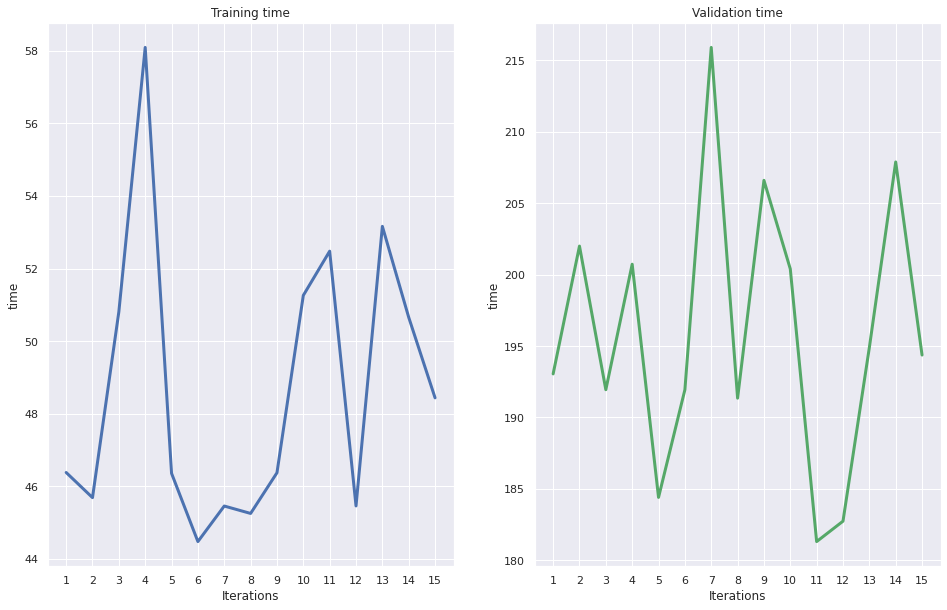

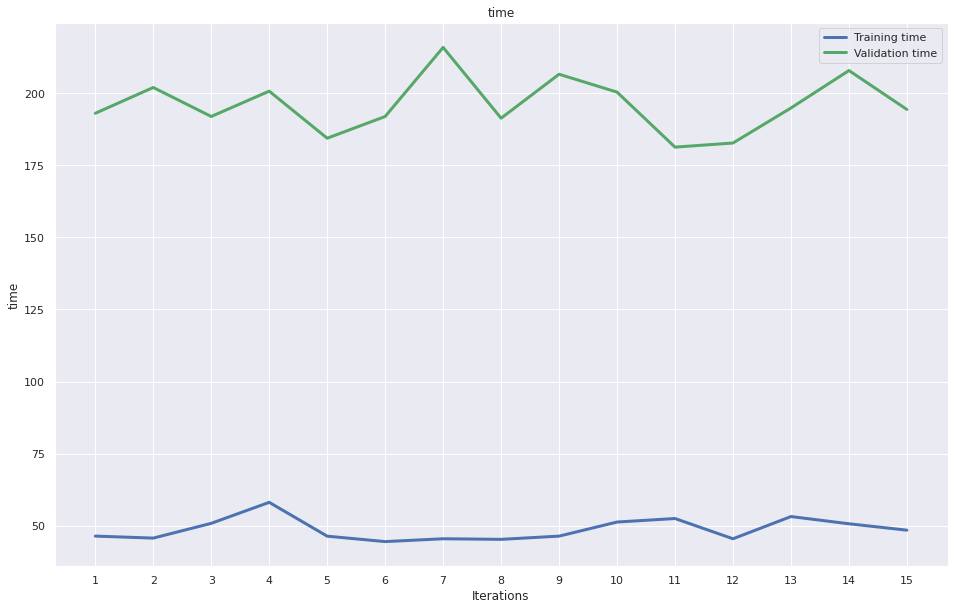

In [27]:
metrics = ['time']
for metric in metrics:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    ax1.plot(iterations, result1, label="Training "+metric, linewidth=3)
    ax1.set_xticks(iterations)
    ax1.set_title('Training '+metric)
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel(metric)

    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    ax2.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    ax2.set_xticks(iterations)
    ax2.set_title('Validation '+metric)
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel(metric)

    plt.figure(1)
    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    plt.figure(figsize=(16, 10))
    plt.xticks(iterations)
    plt.plot(iterations, result1, label="Training "+metric, linewidth=3)
    plt.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    plt.legend()
    plt.title(metric)
    plt.xlabel('Iterations')
    plt.ylabel(metric)
    plt.show()

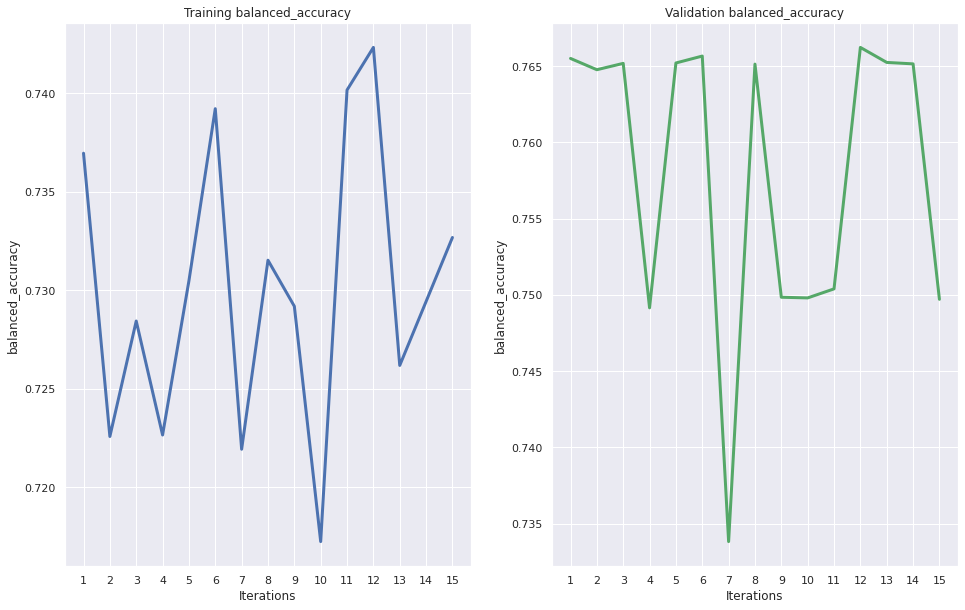

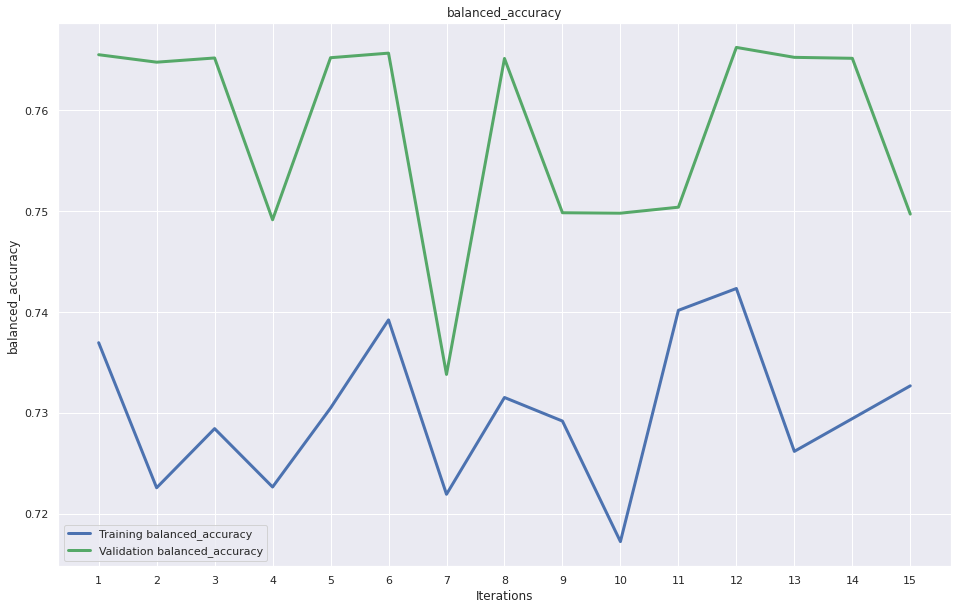

In [28]:
metrics = [ 'balanced_accuracy']
for metric in metrics:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    ax1.plot(iterations, result1, label="Training "+metric, linewidth=3)
    ax1.set_xticks(iterations)
    ax1.set_title('Training '+metric)
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel(metric)

    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    ax2.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    ax2.set_xticks(iterations)
    ax2.set_title('Validation '+metric)
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel(metric)

    plt.figure(1)
    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    plt.figure(figsize=(16, 10))
    plt.xticks(iterations)
    plt.plot(iterations, result1, label="Training "+metric, linewidth=3)
    plt.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    plt.legend()
    plt.title(metric)
    plt.xlabel('Iterations')
    plt.ylabel(metric)
    plt.show()

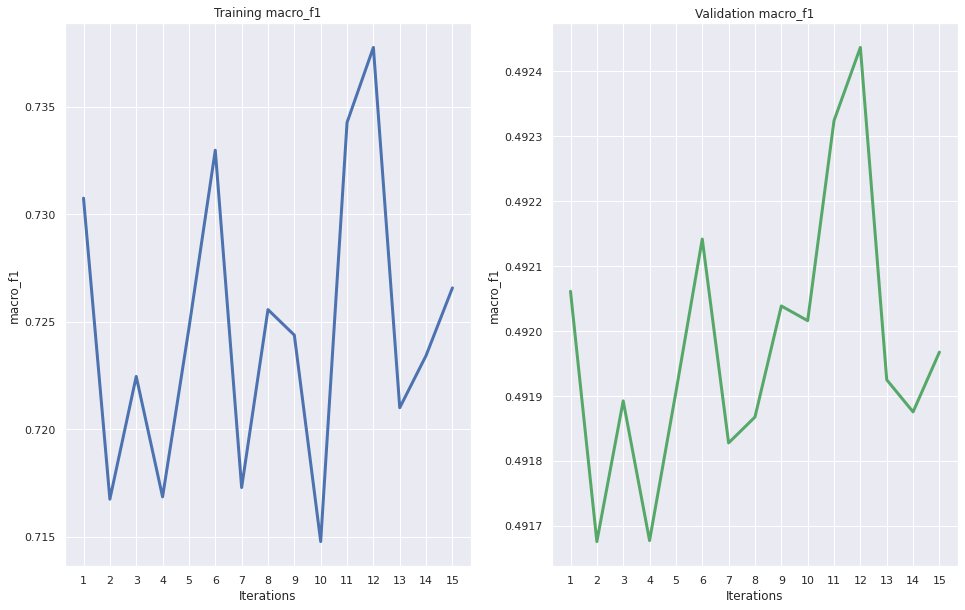

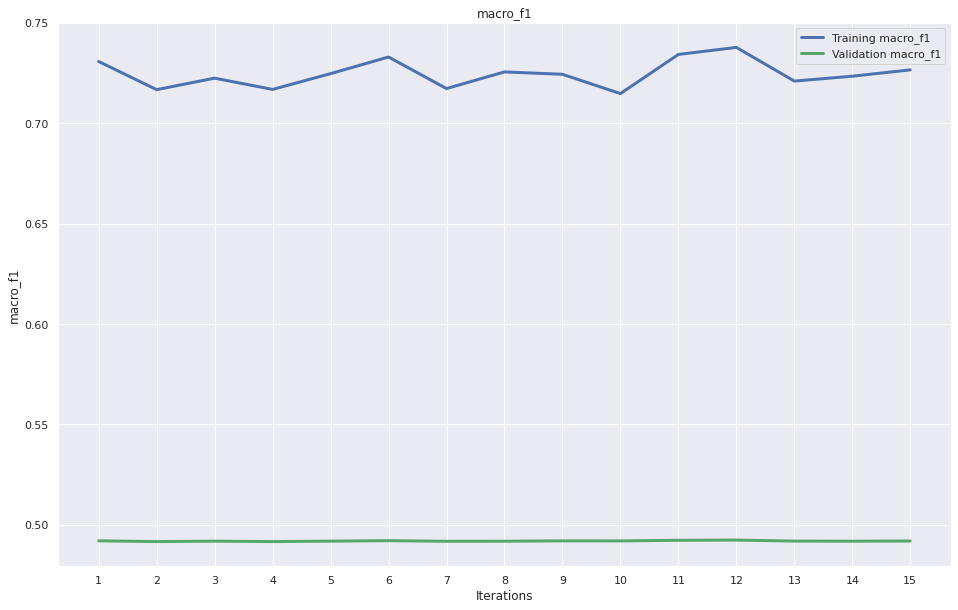

In [29]:
metrics = ['macro_f1']
for metric in metrics:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    ax1.plot(iterations, result1, label="Training "+metric, linewidth=3)
    ax1.set_xticks(iterations)
    ax1.set_title('Training '+metric)
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel(metric)

    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    ax2.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    ax2.set_xticks(iterations)
    ax2.set_title('Validation '+metric)
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel(metric)

    plt.figure(1)
    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    plt.figure(figsize=(16, 10))
    plt.xticks(iterations)
    plt.plot(iterations, result1, label="Training "+metric, linewidth=3)
    plt.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    plt.legend()
    plt.title(metric)
    plt.xlabel('Iterations')
    plt.ylabel(metric)
    plt.show()

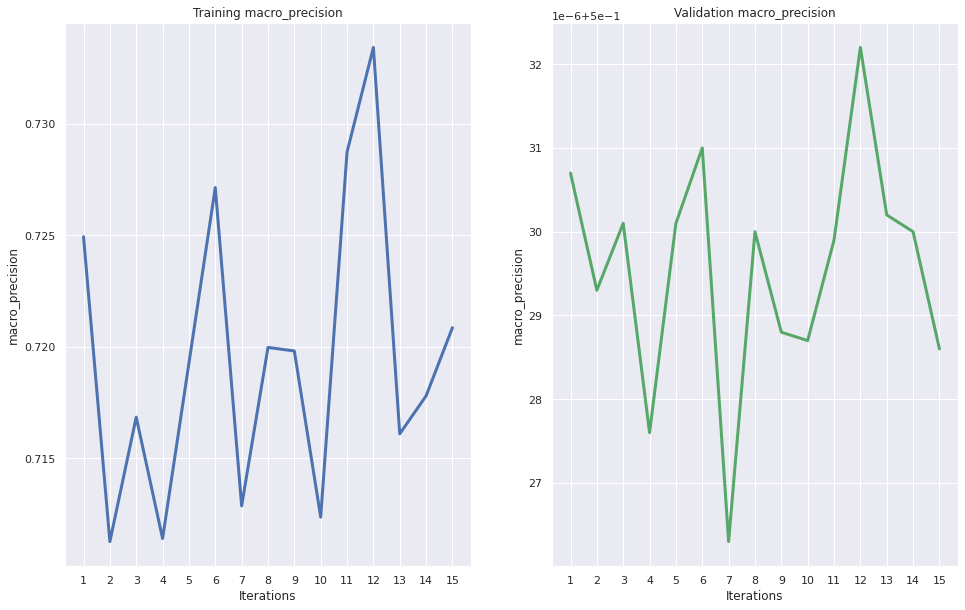

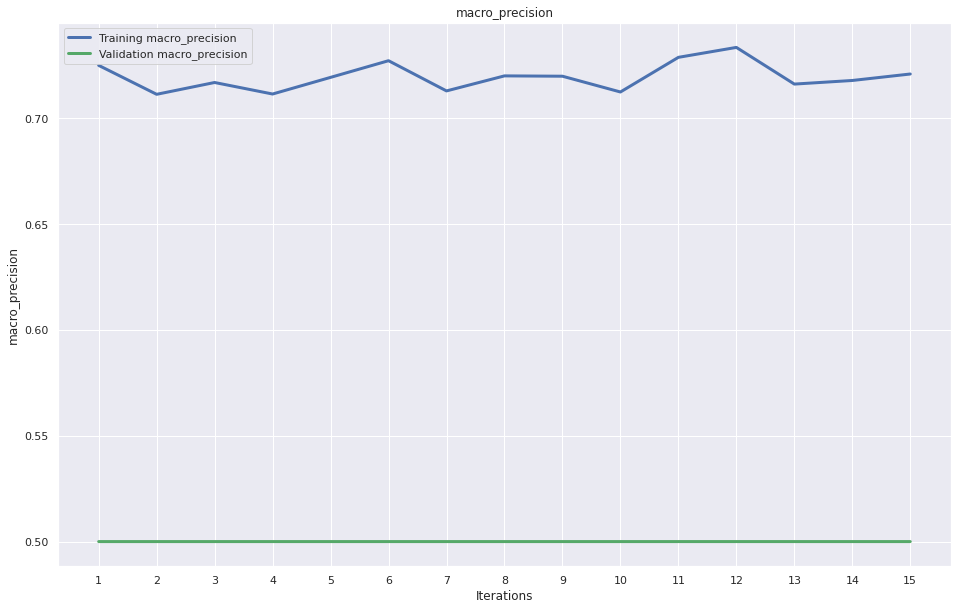

In [30]:
metrics = [ 'macro_precision']
for metric in metrics:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    ax1.plot(iterations, result1, label="Training "+metric, linewidth=3)
    ax1.set_xticks(iterations)
    ax1.set_title('Training '+metric)
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel(metric)

    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    ax2.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    ax2.set_xticks(iterations)
    ax2.set_title('Validation '+metric)
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel(metric)

    plt.figure(1)
    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    plt.figure(figsize=(16, 10))
    plt.xticks(iterations)
    plt.plot(iterations, result1, label="Training "+metric, linewidth=3)
    plt.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    plt.legend()
    plt.title(metric)
    plt.xlabel('Iterations')
    plt.ylabel(metric)
    plt.show()

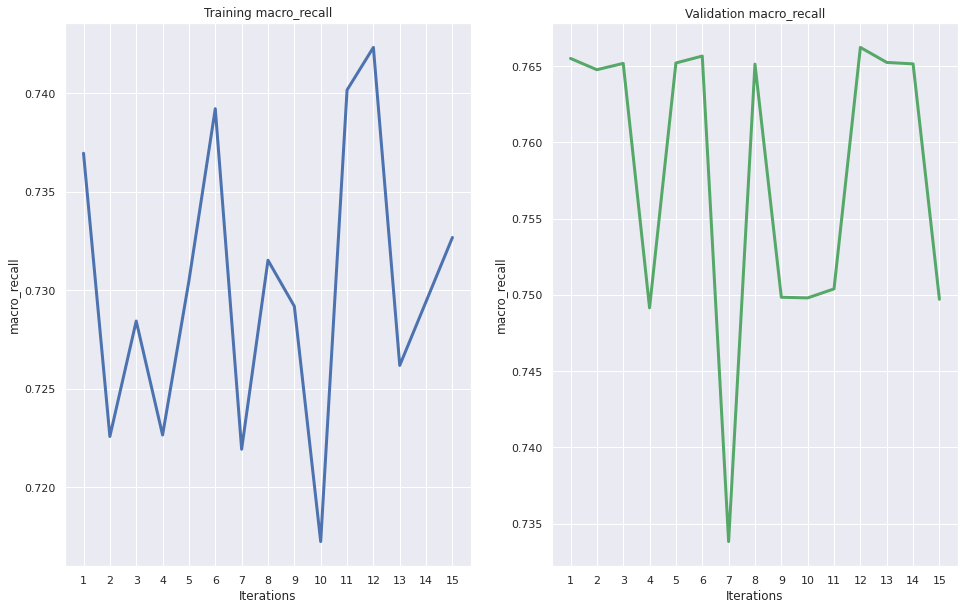

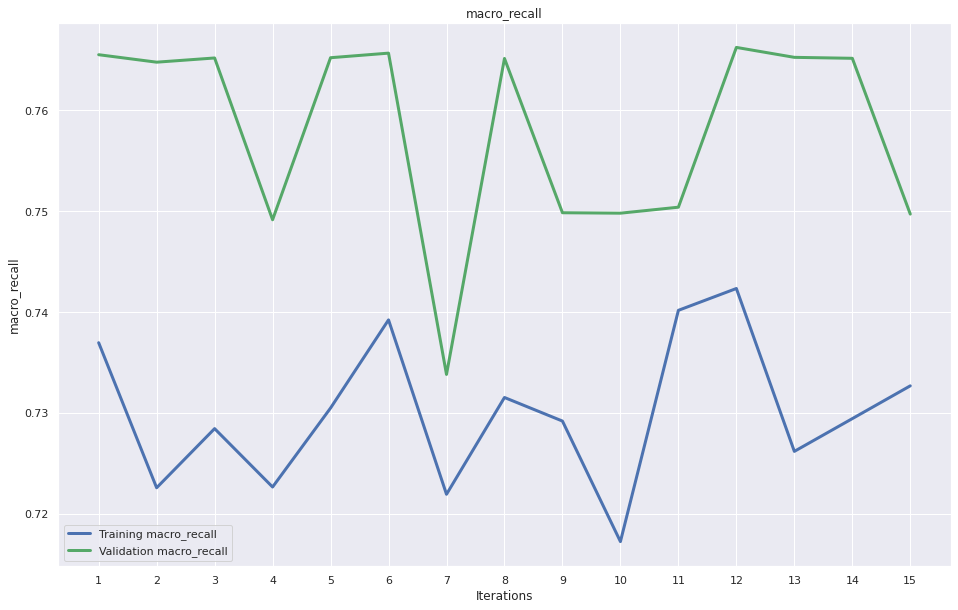

In [31]:
metrics = ['macro_recall']
for metric in metrics:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    ax1.plot(iterations, result1, label="Training "+metric, linewidth=3)
    ax1.set_xticks(iterations)
    ax1.set_title('Training '+metric)
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel(metric)

    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    ax2.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    ax2.set_xticks(iterations)
    ax2.set_title('Validation '+metric)
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel(metric)

    plt.figure(1)
    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    plt.figure(figsize=(16, 10))
    plt.xticks(iterations)
    plt.plot(iterations, result1, label="Training "+metric, linewidth=3)
    plt.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    plt.legend()
    plt.title(metric)
    plt.xlabel('Iterations')
    plt.ylabel(metric)
    plt.show()

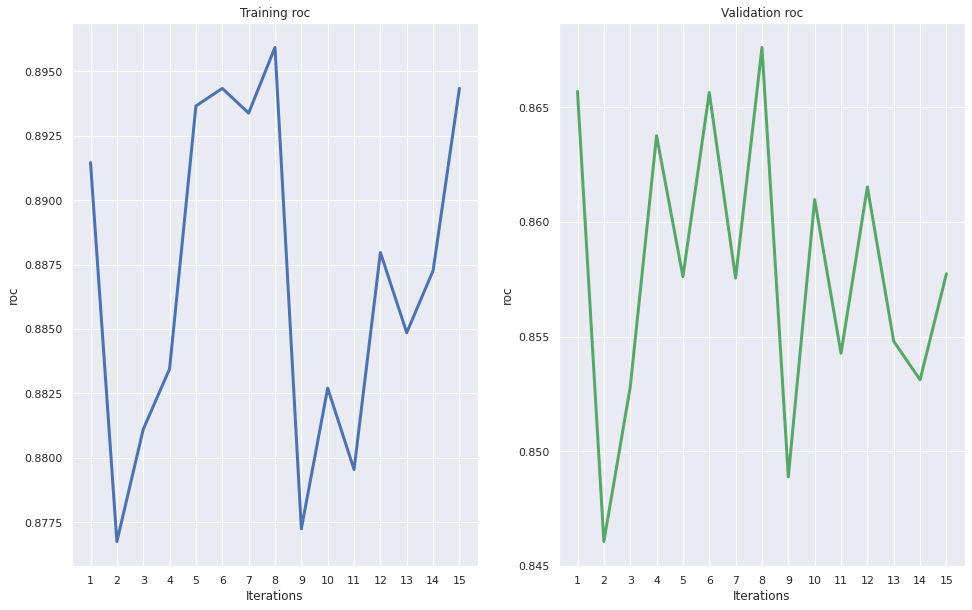

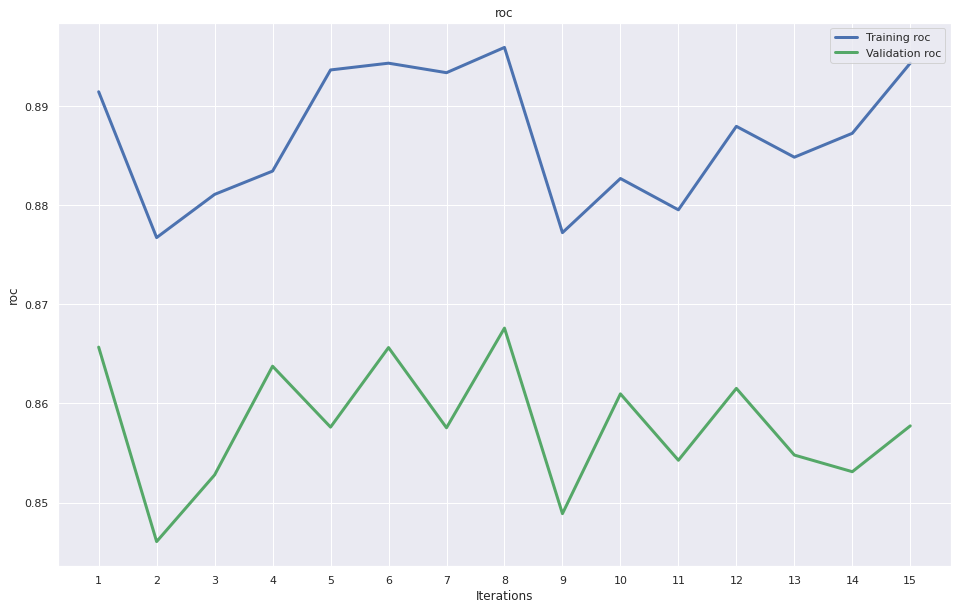

In [32]:
metrics = [ 'roc']
for metric in metrics:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    ax1.plot(iterations, result1, label="Training "+metric, linewidth=3)
    ax1.set_xticks(iterations)
    ax1.set_title('Training '+metric)
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel(metric)

    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    ax2.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    ax2.set_xticks(iterations)
    ax2.set_title('Validation '+metric)
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel(metric)

    plt.figure(1)
    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    plt.figure(figsize=(16, 10))
    plt.xticks(iterations)
    plt.plot(iterations, result1, label="Training "+metric, linewidth=3)
    plt.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    plt.legend()
    plt.title(metric)
    plt.xlabel('Iterations')
    plt.ylabel(metric)
    plt.show()

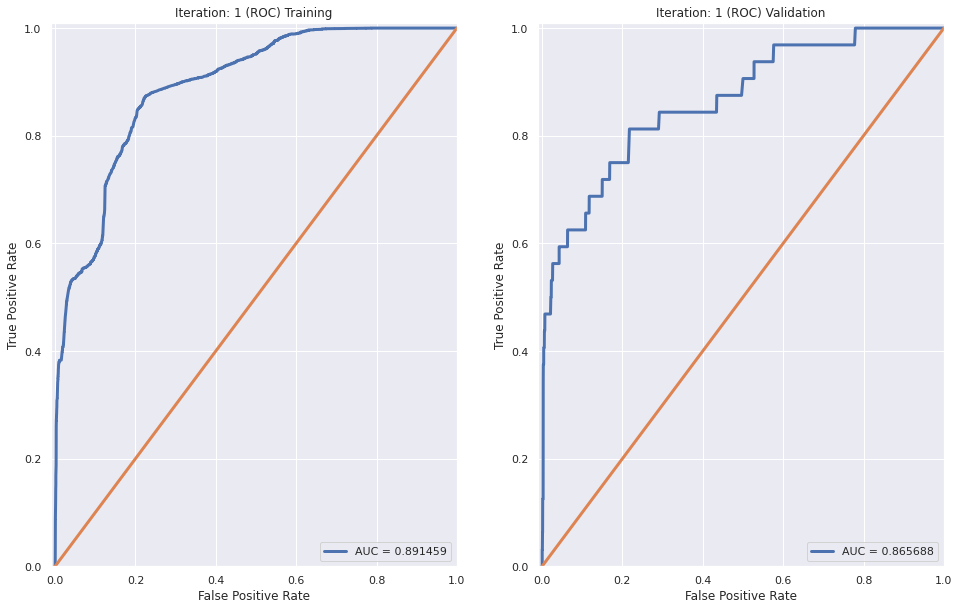

<Figure size 432x288 with 0 Axes>

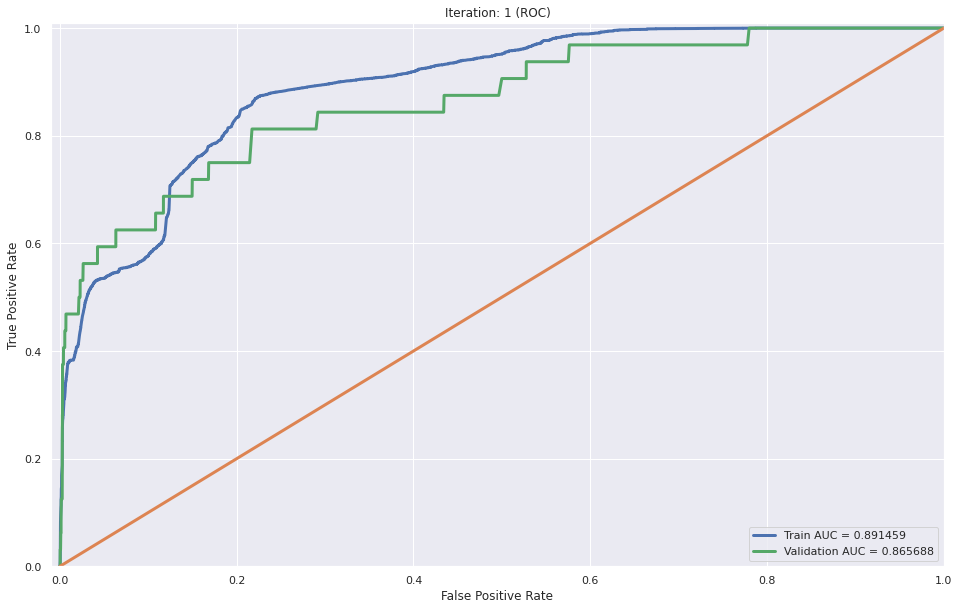

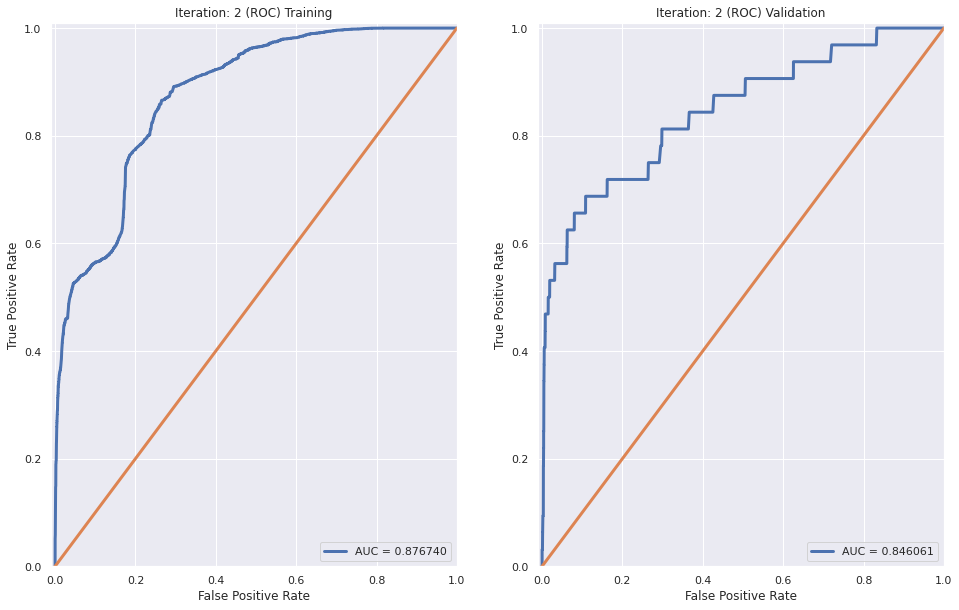

<Figure size 432x288 with 0 Axes>

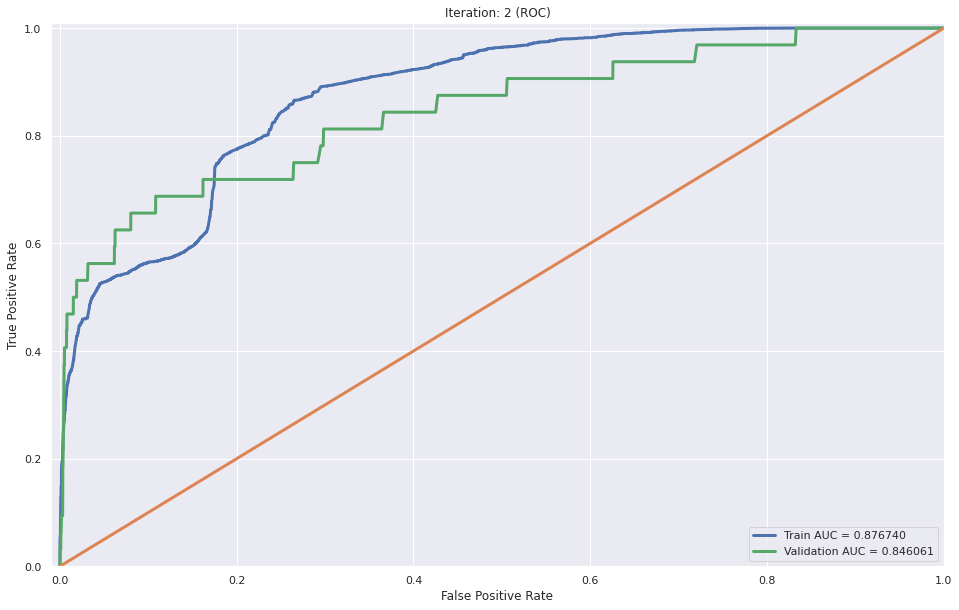

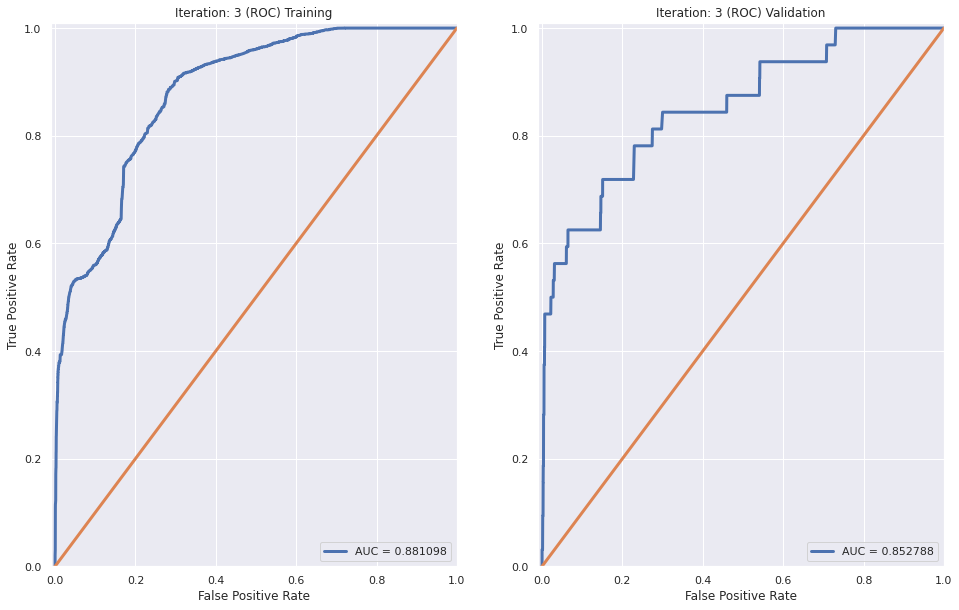

<Figure size 432x288 with 0 Axes>

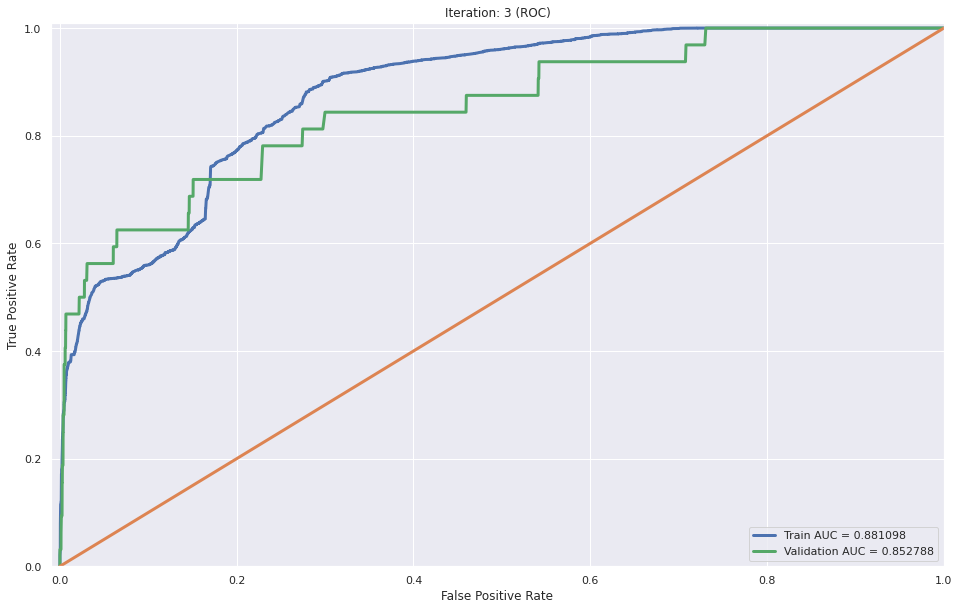

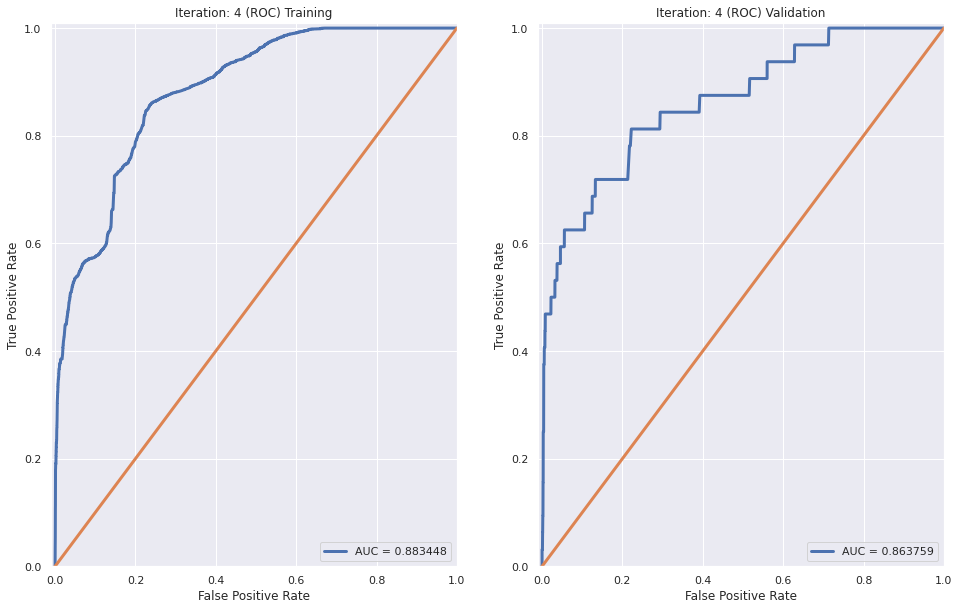

<Figure size 432x288 with 0 Axes>

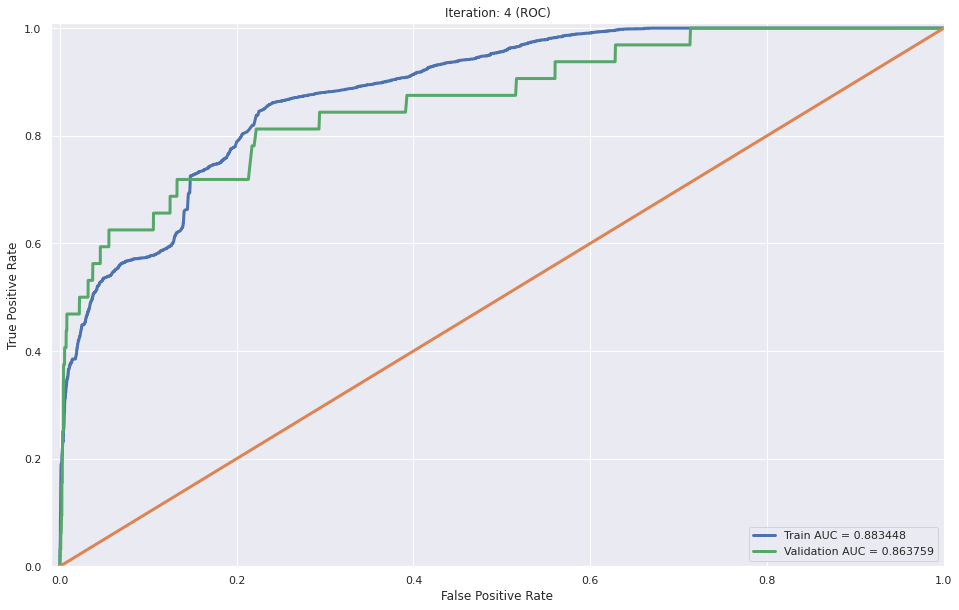

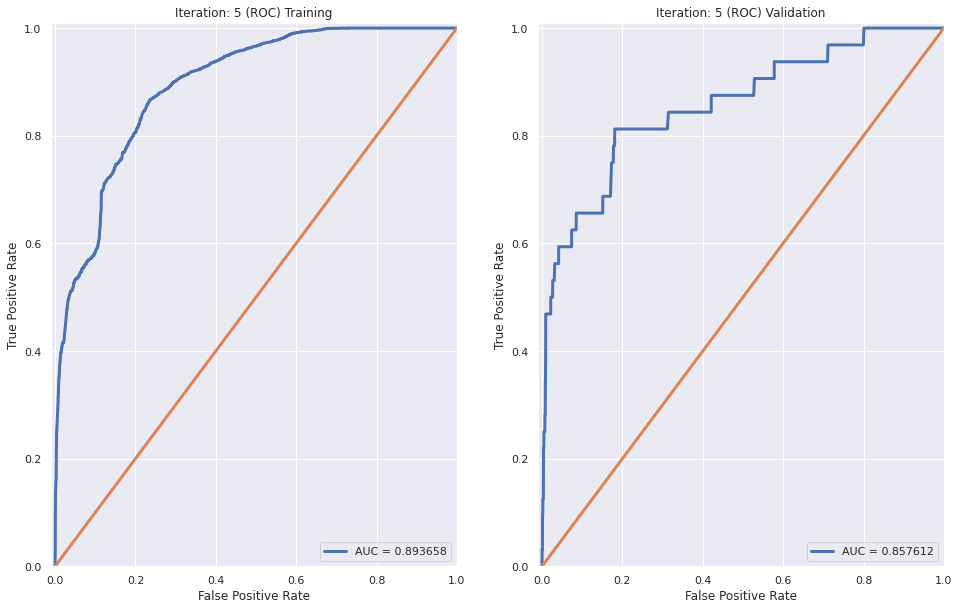

<Figure size 432x288 with 0 Axes>

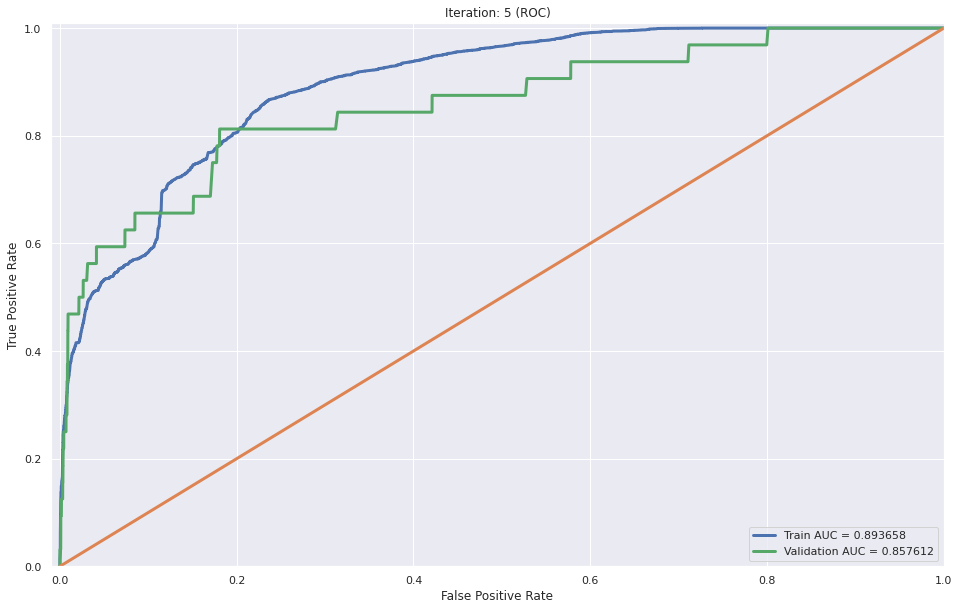

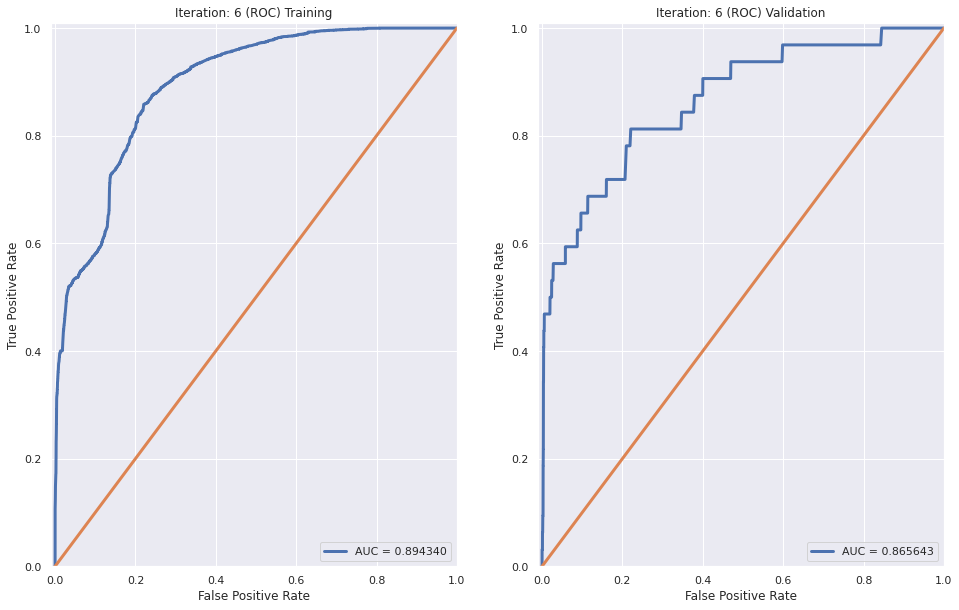

<Figure size 432x288 with 0 Axes>

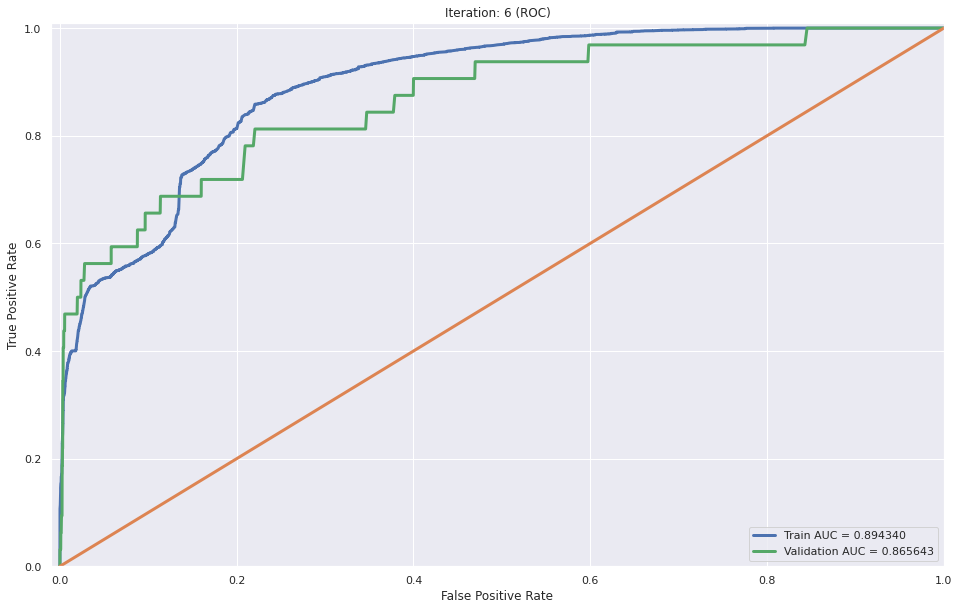

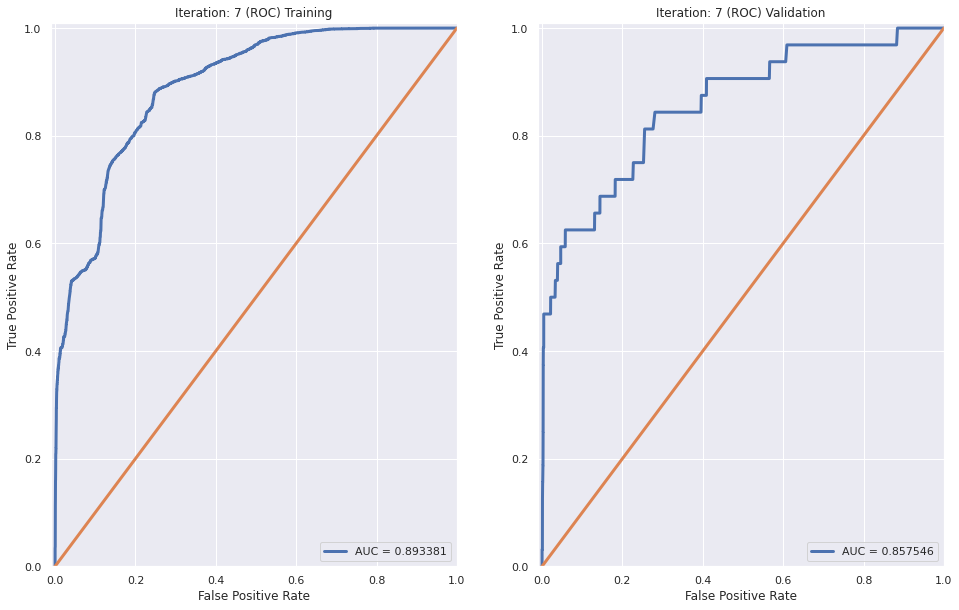

<Figure size 432x288 with 0 Axes>

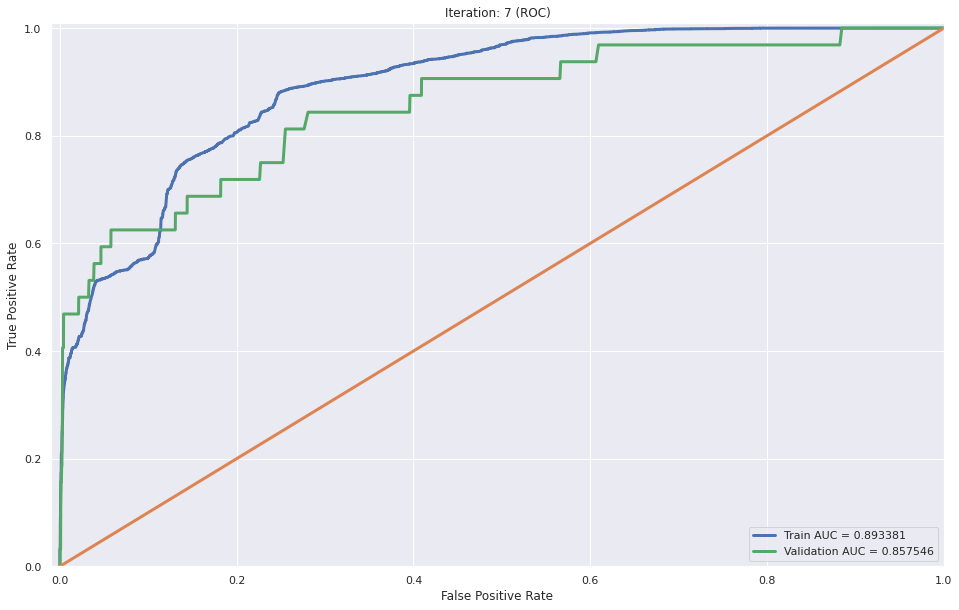

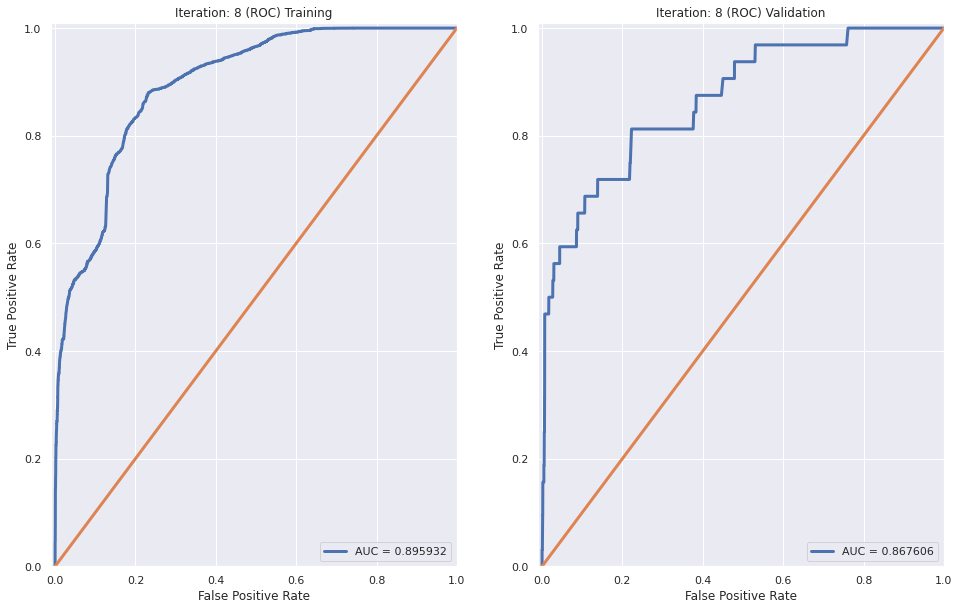

<Figure size 432x288 with 0 Axes>

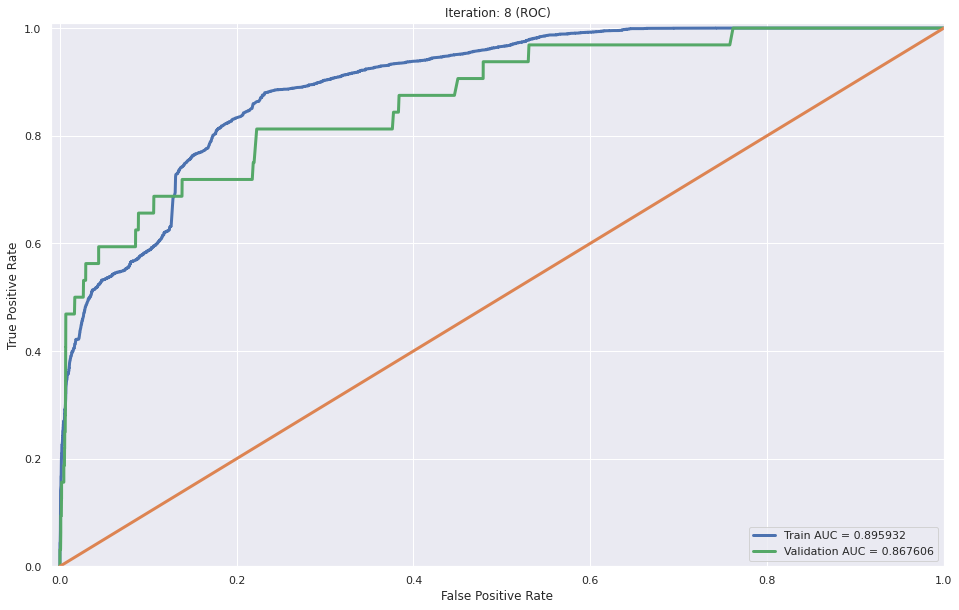

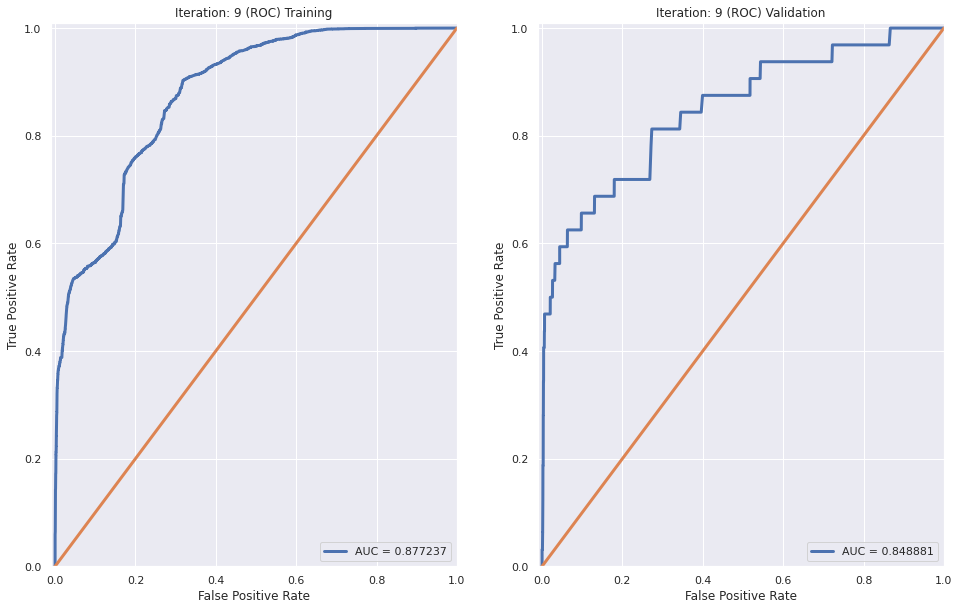

<Figure size 432x288 with 0 Axes>

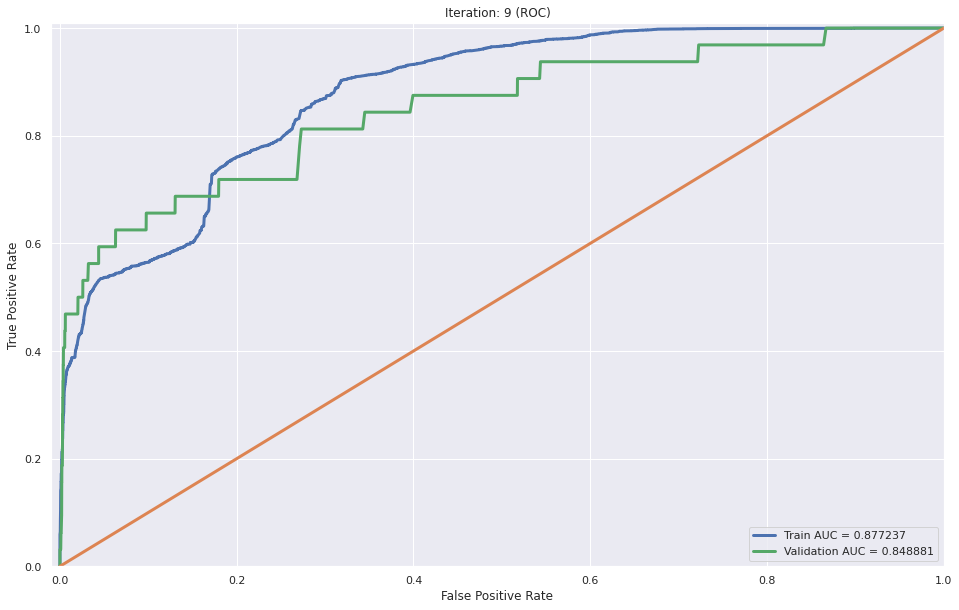

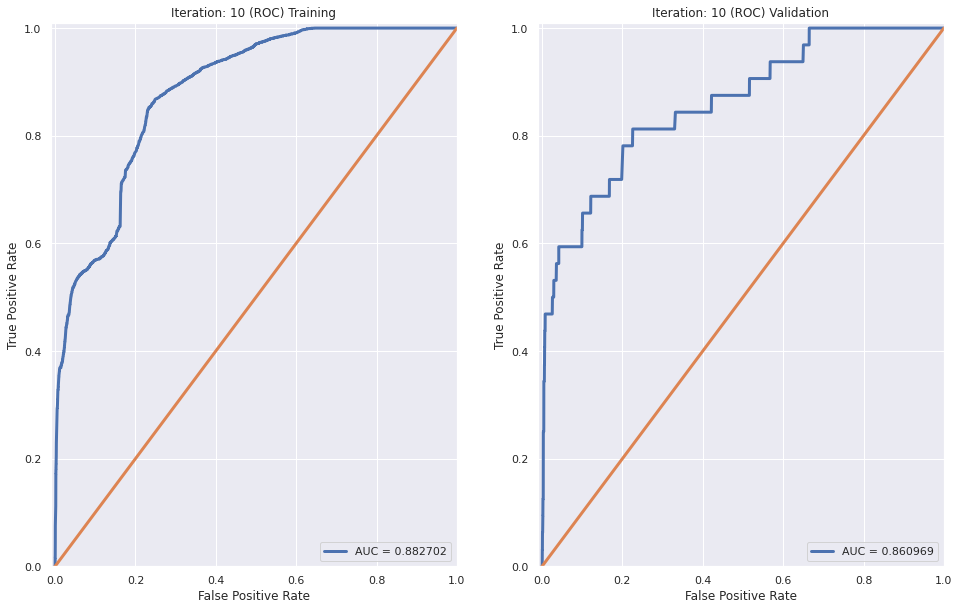

<Figure size 432x288 with 0 Axes>

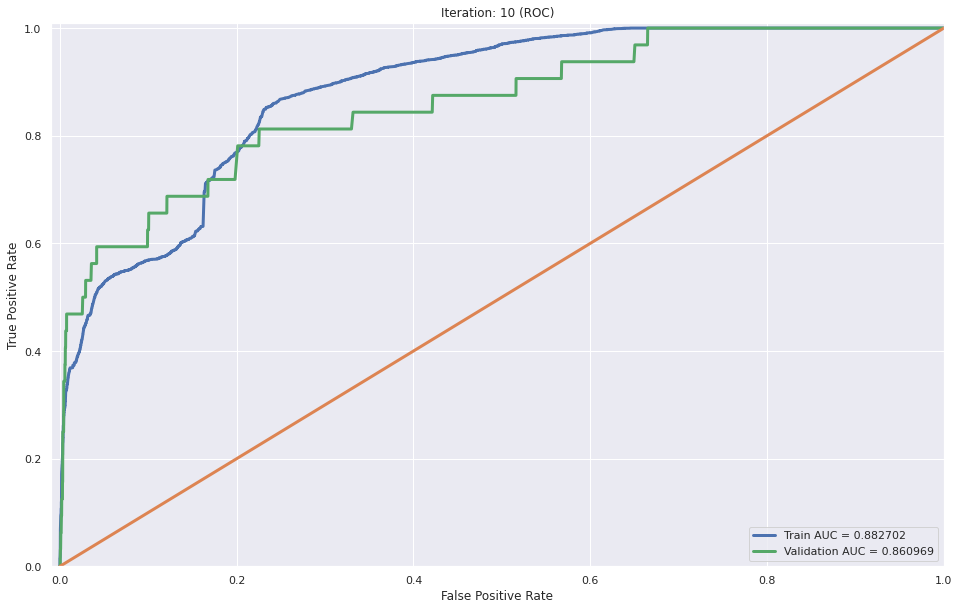

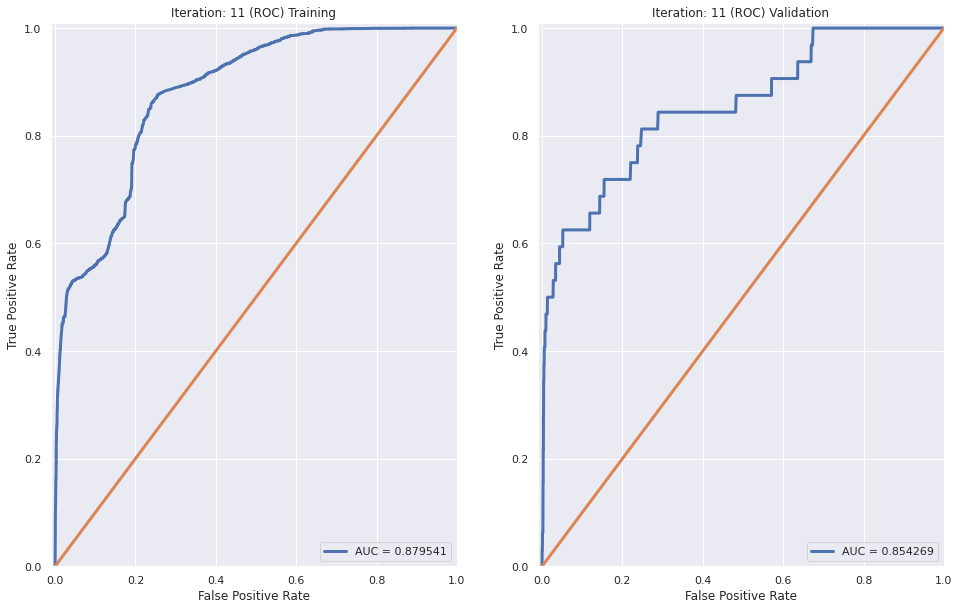

<Figure size 432x288 with 0 Axes>

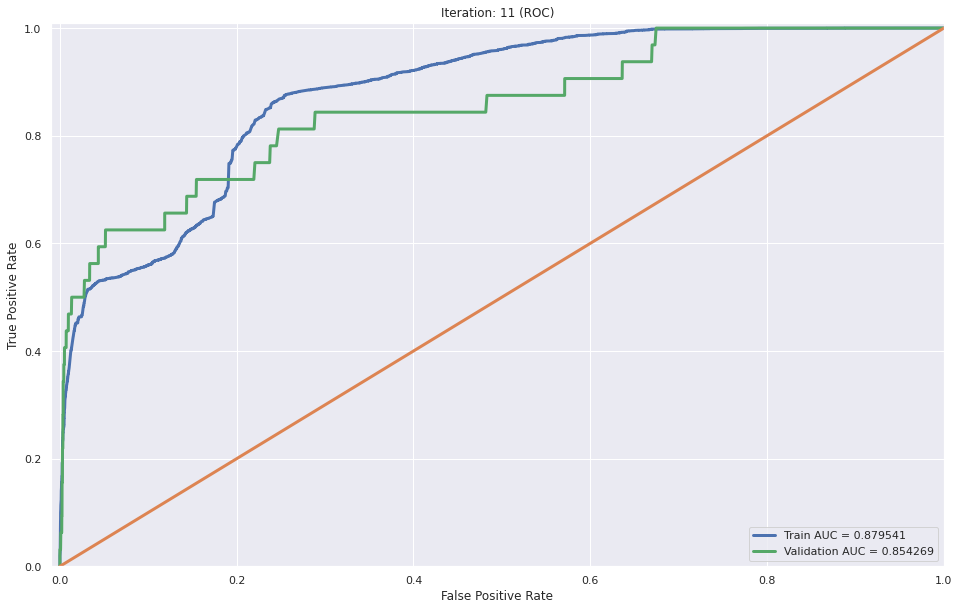

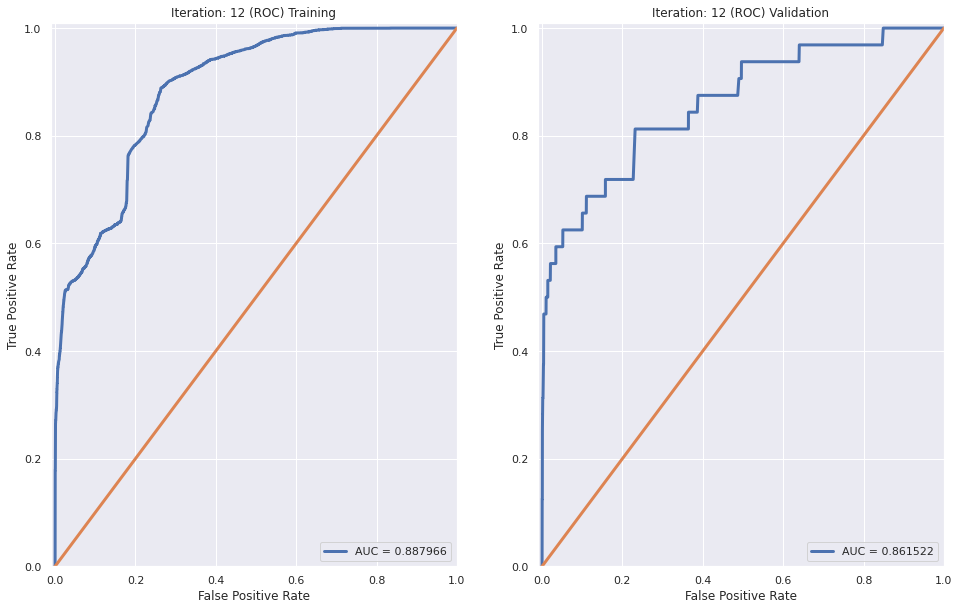

<Figure size 432x288 with 0 Axes>

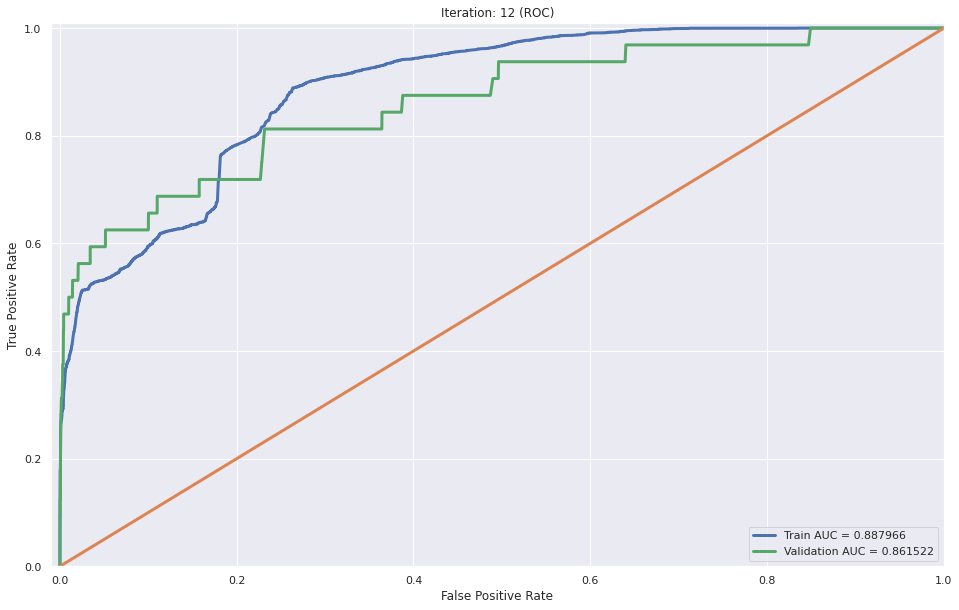

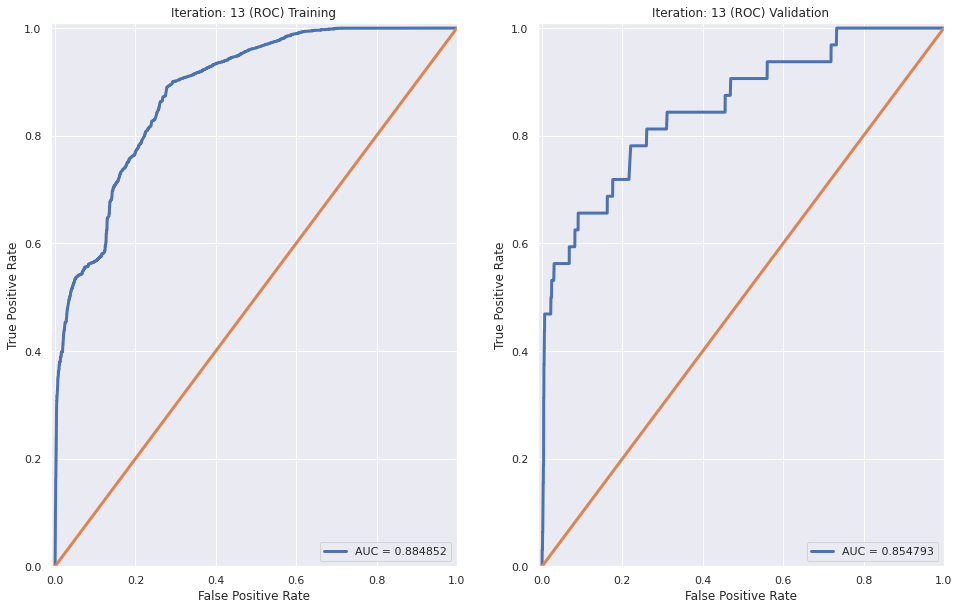

<Figure size 432x288 with 0 Axes>

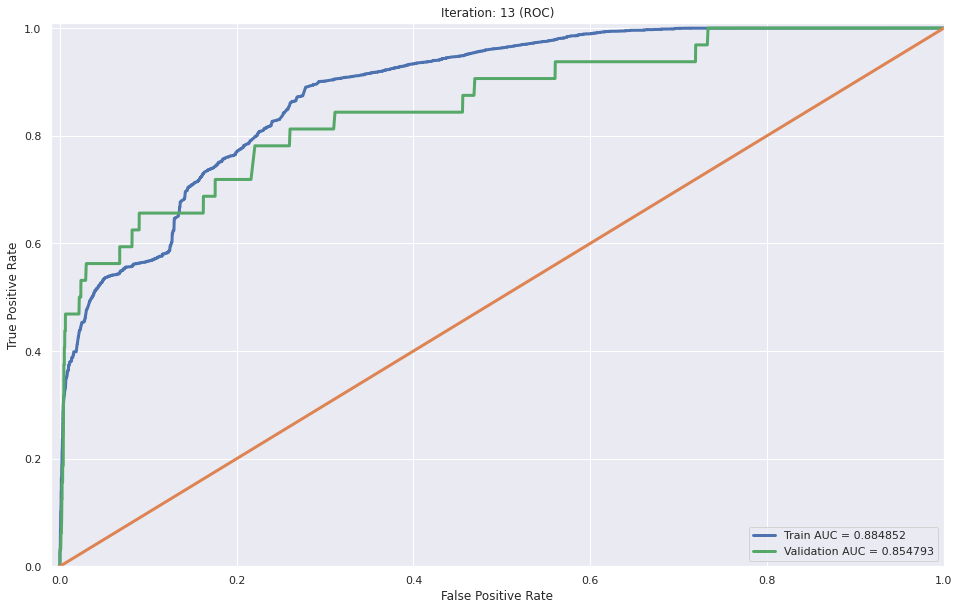

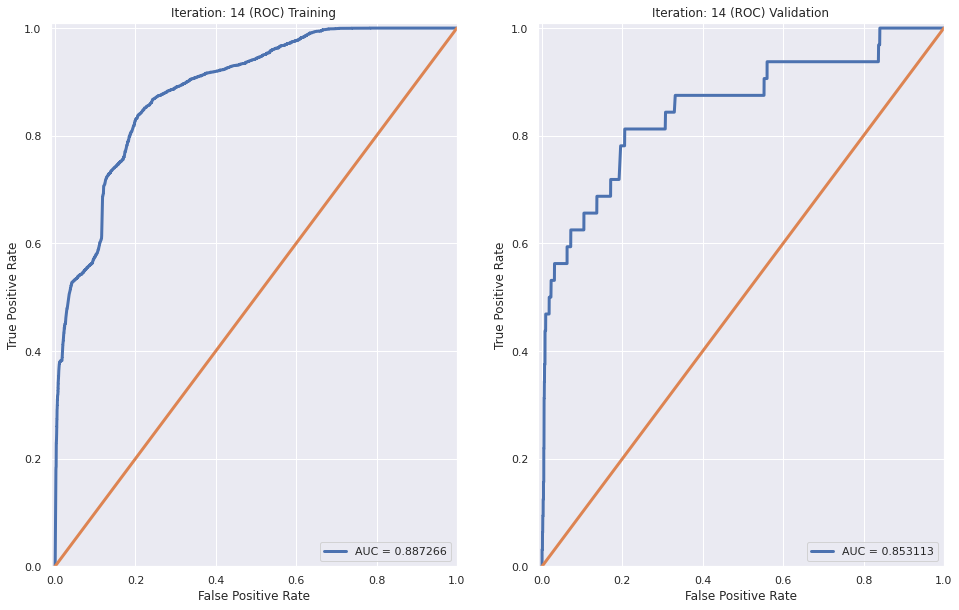

<Figure size 432x288 with 0 Axes>

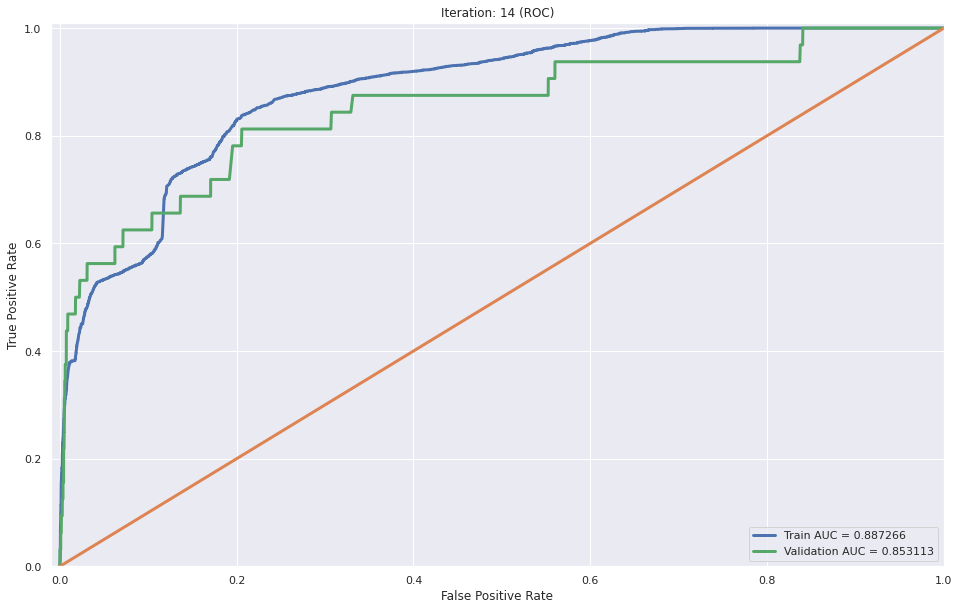

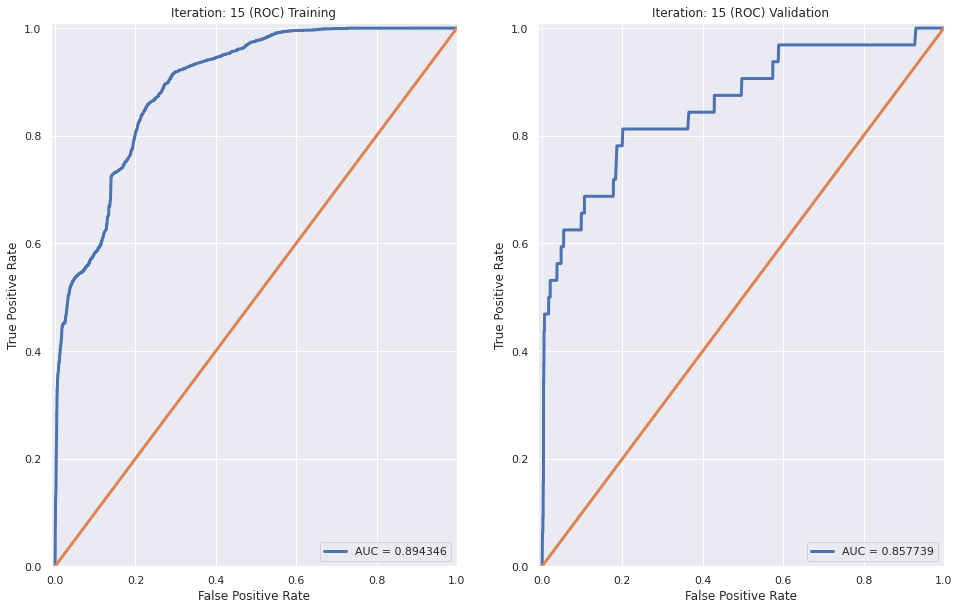

<Figure size 432x288 with 0 Axes>

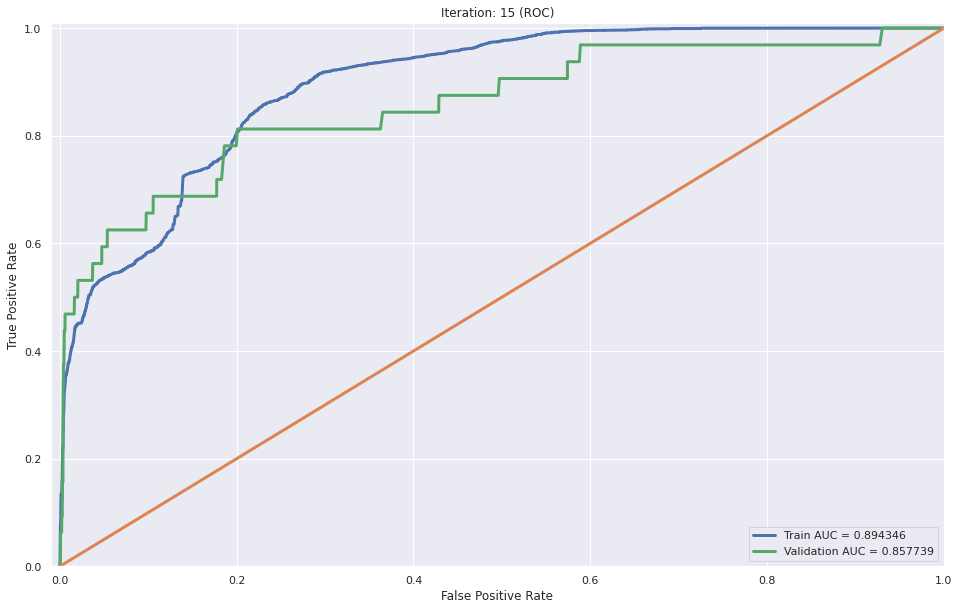

In [33]:
for it in iterations:
    false_pos_rate = eval_train[it]['false_pos_rate']
    true_pos_rate = eval_train[it]['true_pos_rate']
    roc_auc = auc(false_pos_rate, true_pos_rate)

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

    ax1.plot(false_pos_rate, true_pos_rate, linewidth=3, label='AUC = %f'% roc_auc)
    ax1.plot([0,1],[0,1], linewidth=3)

    ax1.set_xlim([-0.01, 1])
    ax1.set_ylim([0, 1.01])
    ax1.legend(loc='lower right')
    ax1.set_title('Iteration: '+ str(it) +' (ROC) Training')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_xlabel('False Positive Rate')


    test_false_pos_rate = eval_test[it]['false_pos_rate']
    test_true_pos_rate = eval_test[it]['true_pos_rate']
    test_roc_auc = auc(test_false_pos_rate, test_true_pos_rate)

    ax2.plot(test_false_pos_rate, test_true_pos_rate, linewidth=3, label='AUC = %f'% test_roc_auc)
    ax2.plot([0,1],[0,1], linewidth=3)

    ax2.set_xlim([-0.01, 1])
    ax2.set_ylim([0, 1.01])
    ax2.legend(loc='lower right')
    ax2.set_title('Iteration: '+ str(it) +' (ROC) Validation')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_xlabel('False Positive Rate')

    plt.figure(2)
    false_pos_rate = eval_train[it]['false_pos_rate']
    true_pos_rate = eval_train[it]['true_pos_rate']
    roc_auc = auc(false_pos_rate, true_pos_rate)

    test_false_pos_rate = eval_test[it]['false_pos_rate']
    test_true_pos_rate = eval_test[it]['true_pos_rate']
    test_roc_auc = auc(test_false_pos_rate, test_true_pos_rate)

    plt.figure(figsize=(16, 10))
    plt.plot(false_pos_rate, true_pos_rate, linewidth=3, label='Train AUC = %f'% roc_auc)
    plt.plot(test_false_pos_rate, test_true_pos_rate, linewidth=3, label='Validation AUC = %f'% test_roc_auc, color='g')
    plt.plot([0,1],[0,1], linewidth=3)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])

    plt.legend(loc='lower right')
    plt.title('Iteration: '+ str(it) +' (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

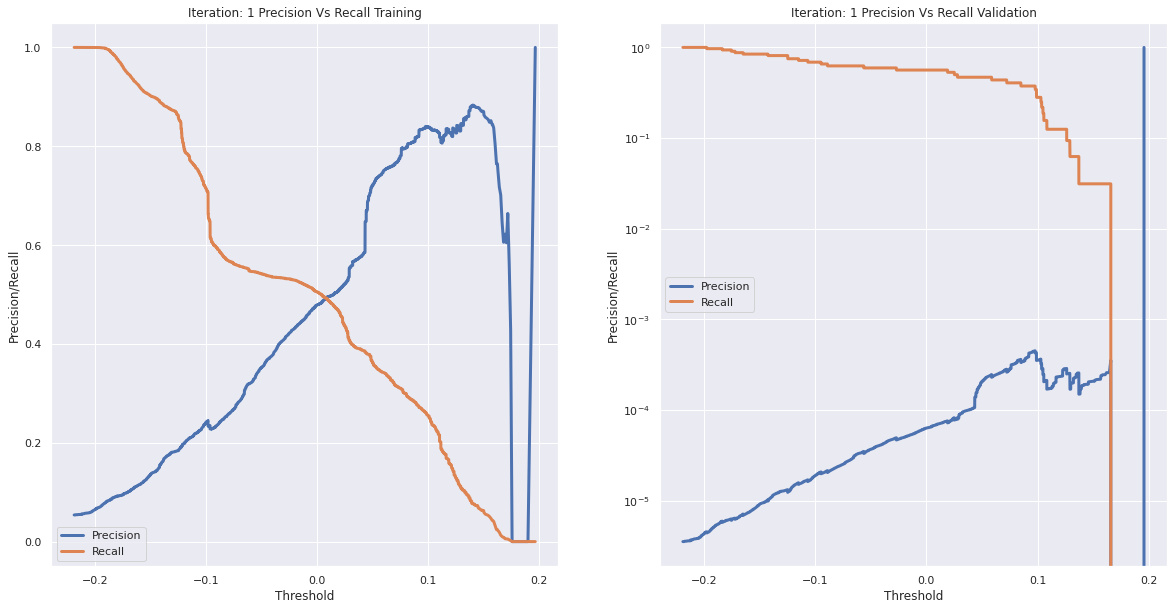

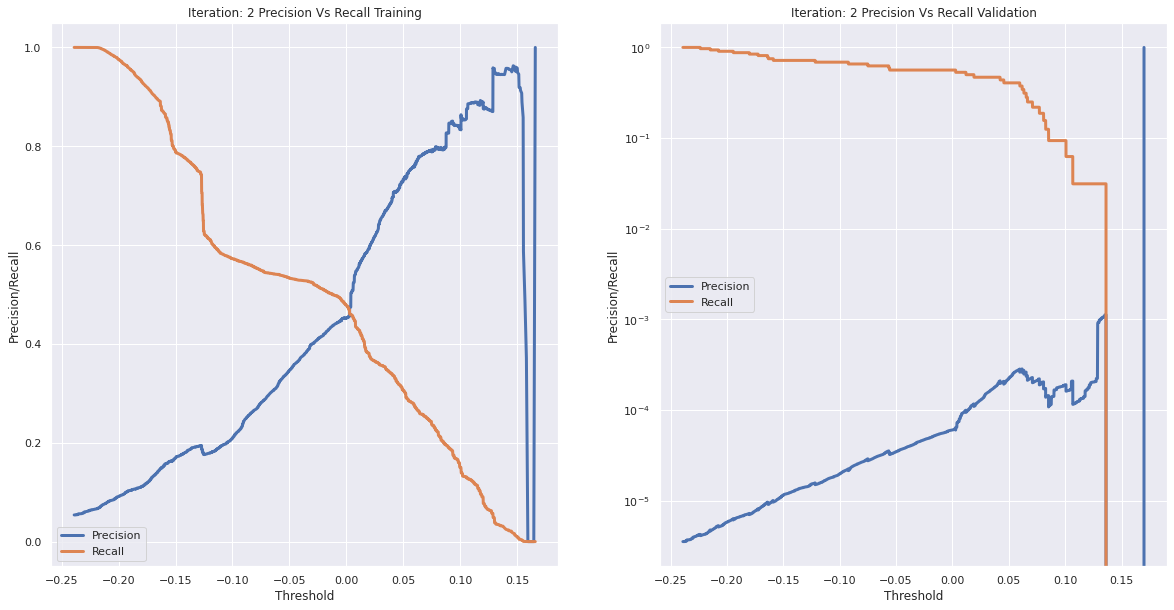

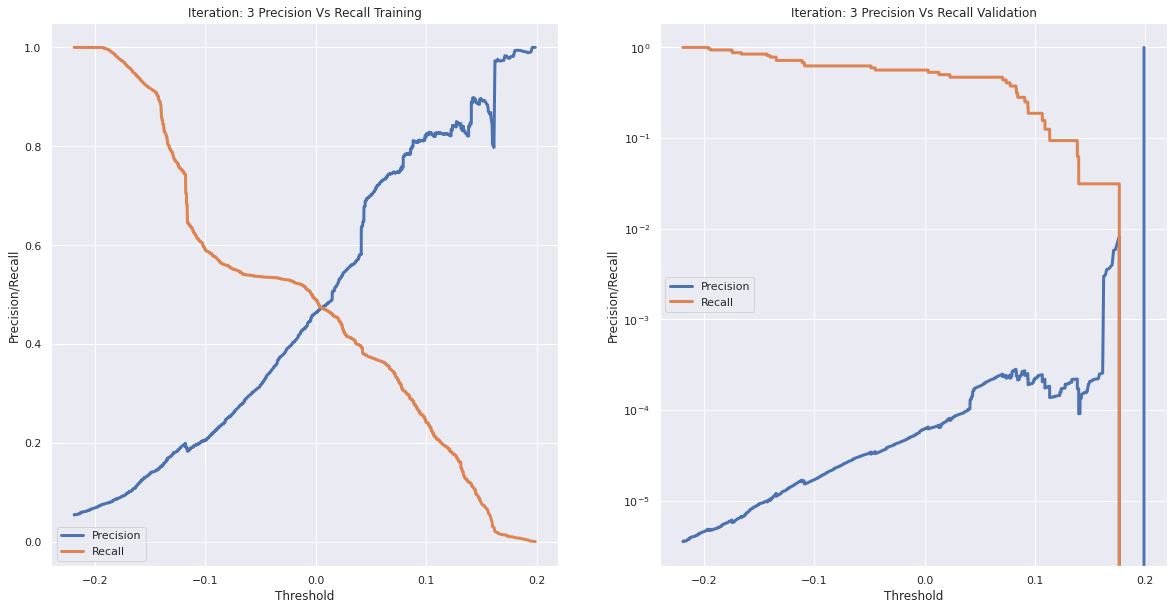

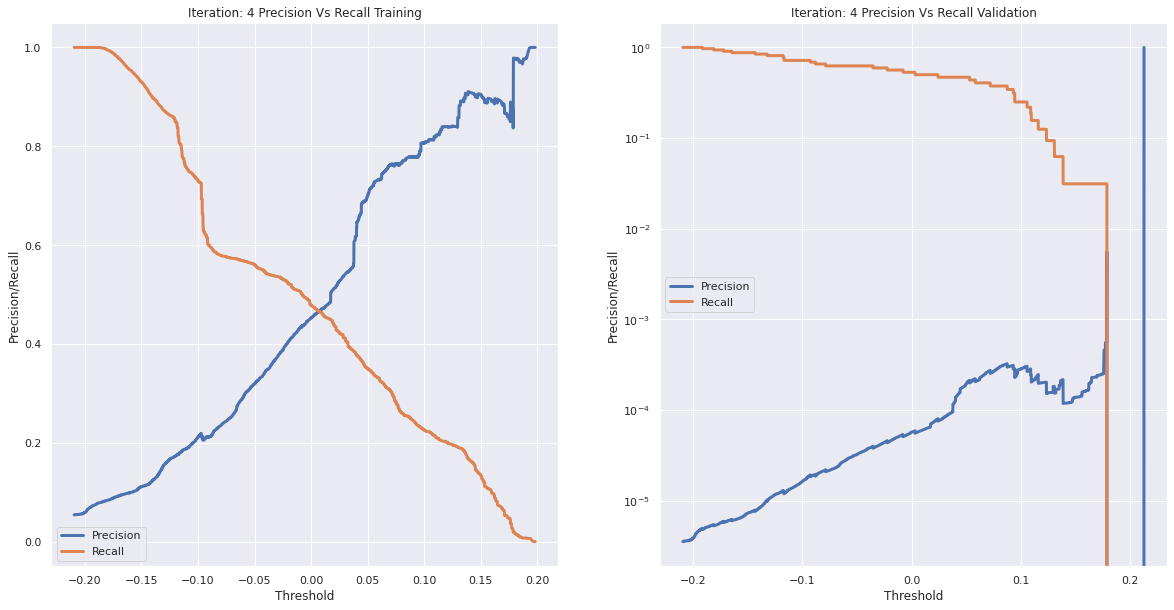

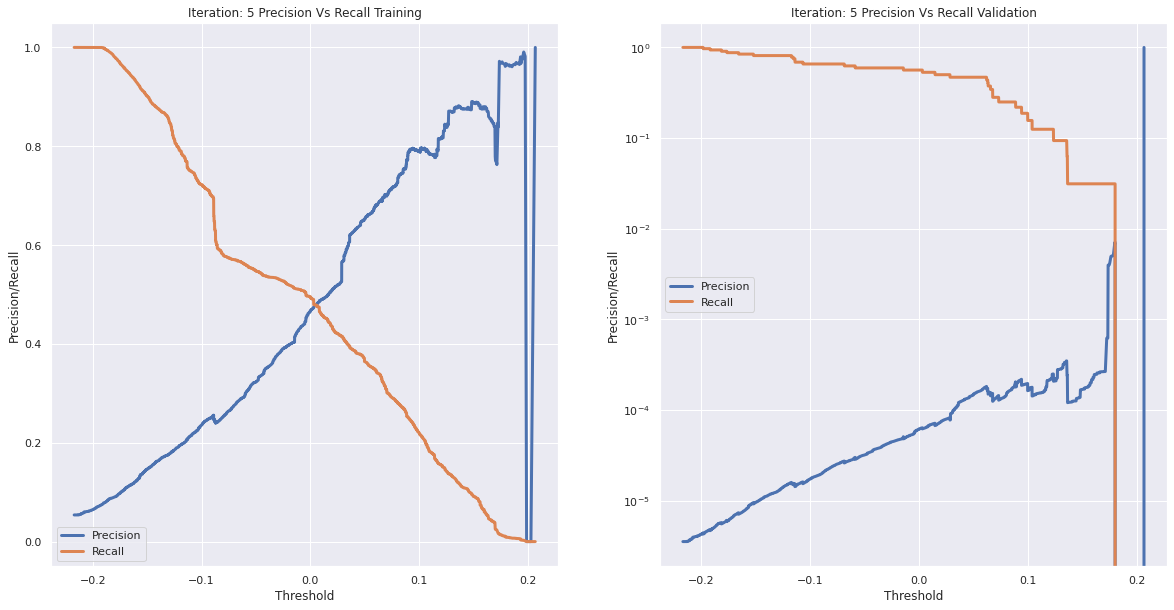

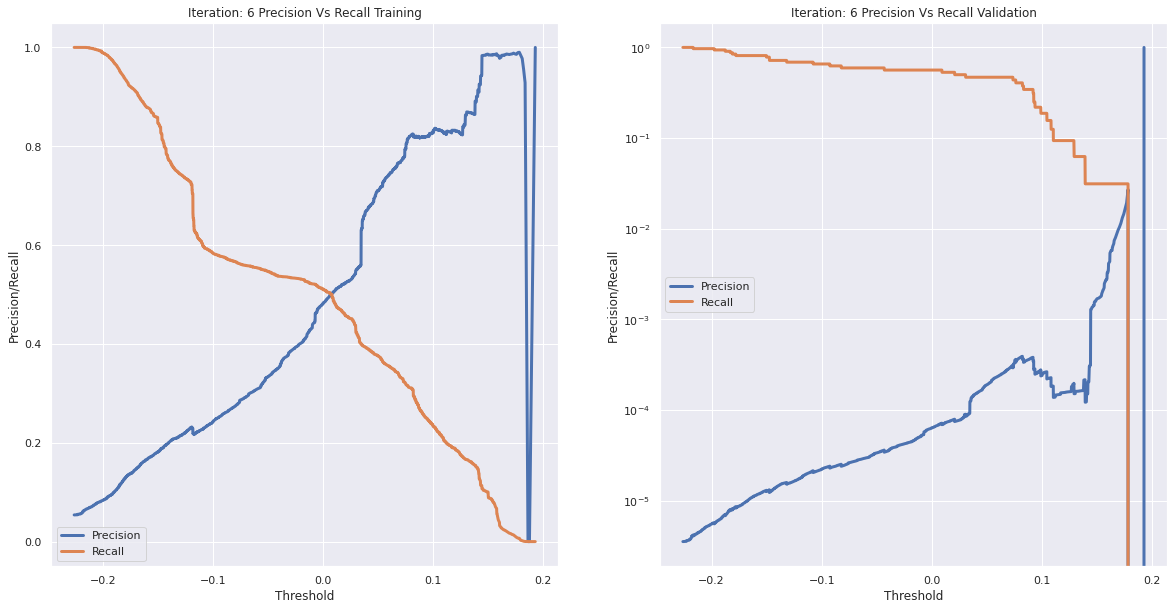

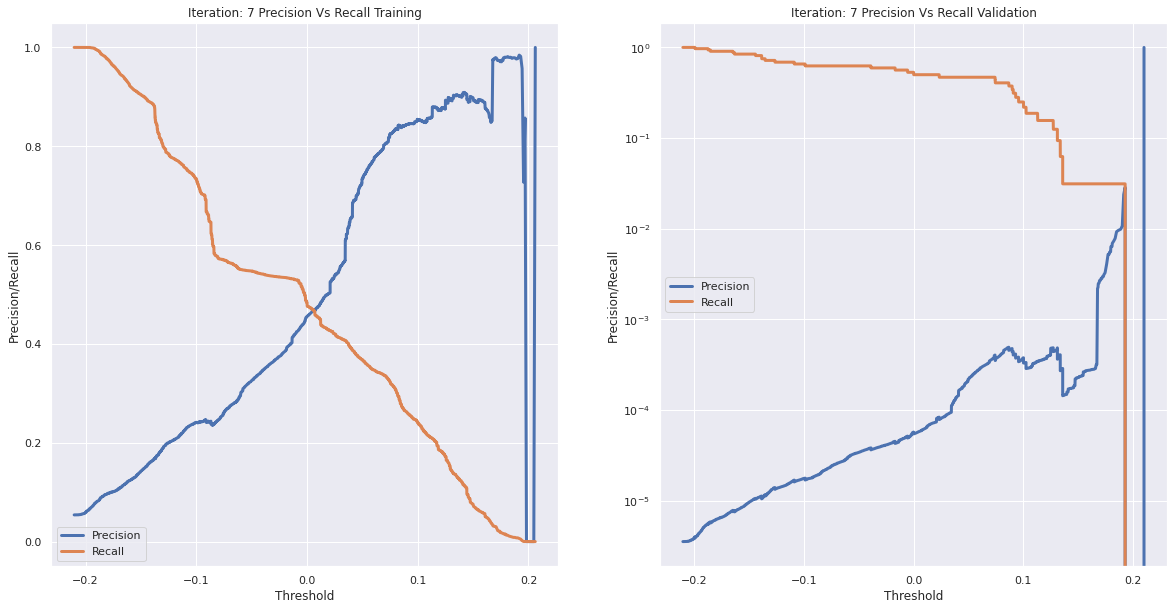

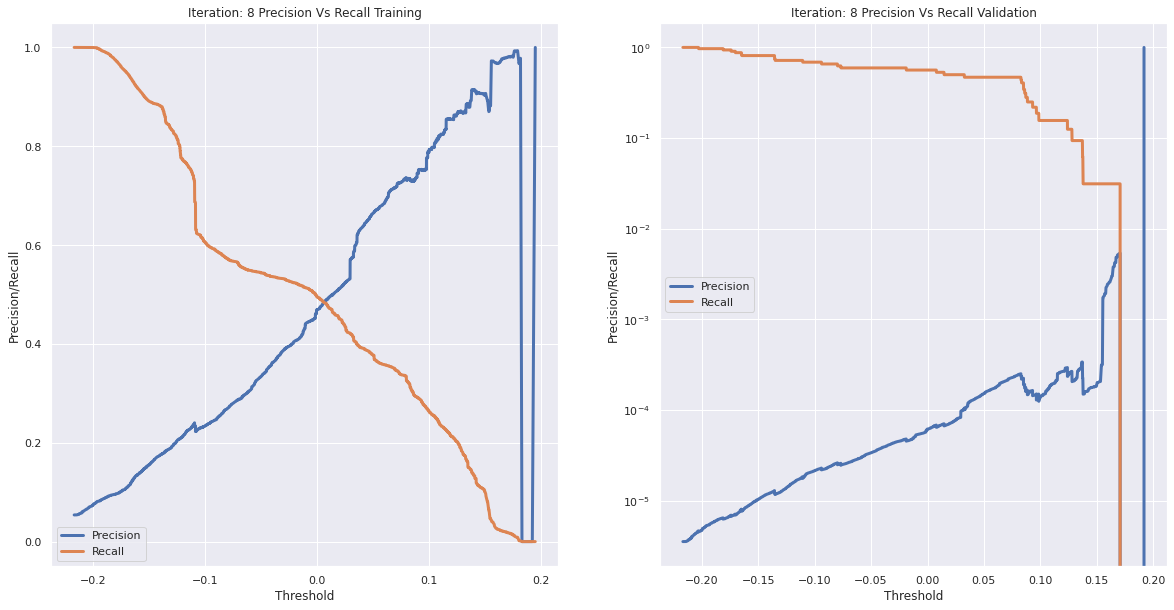

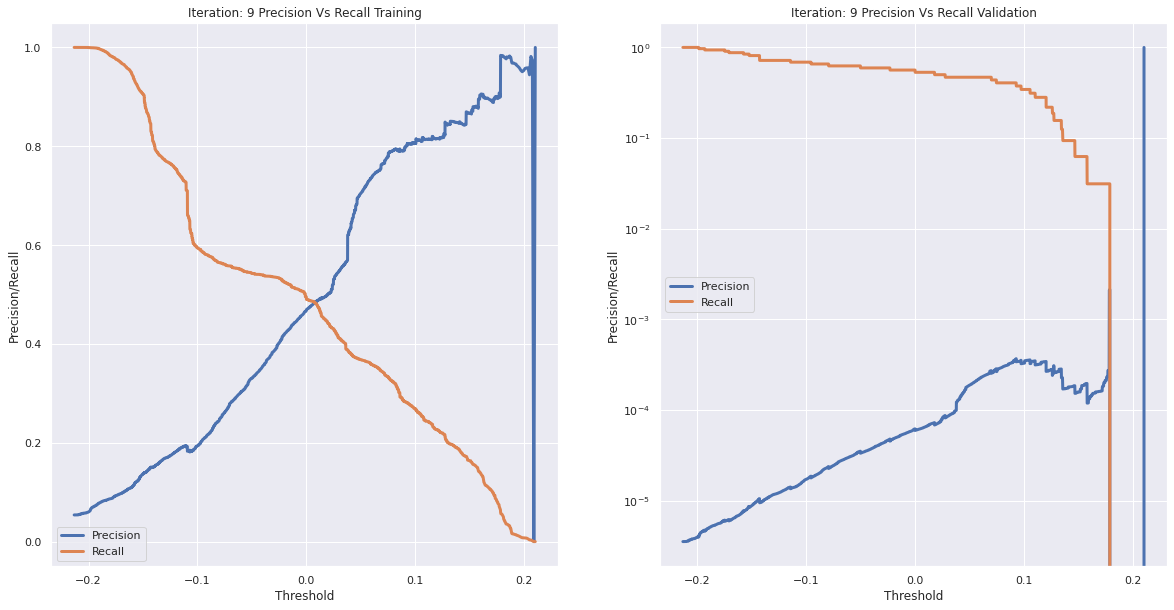

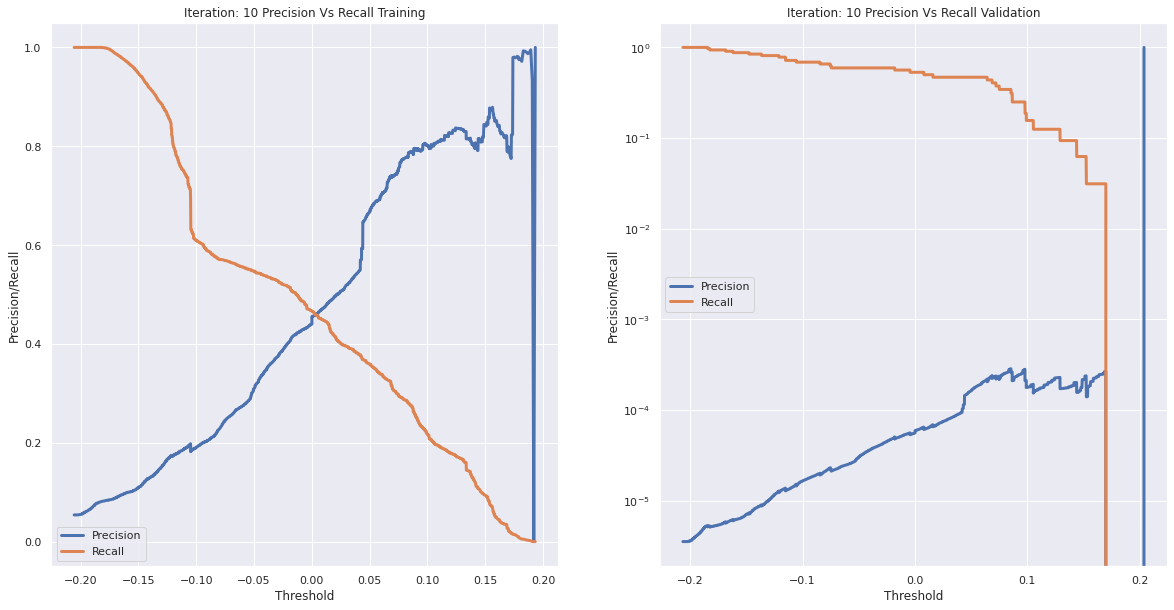

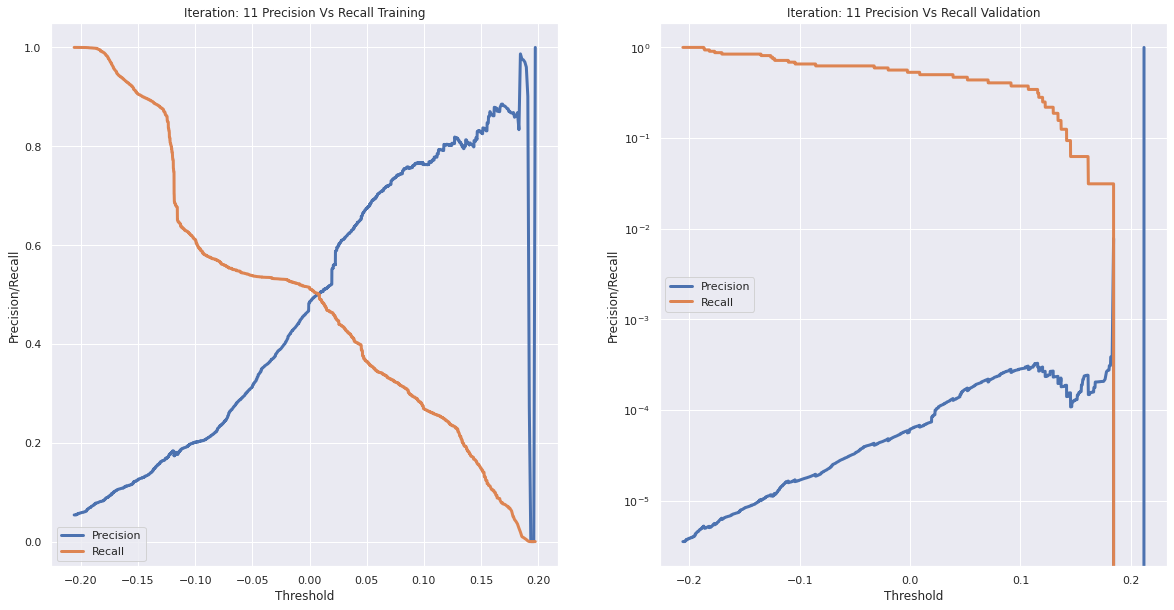

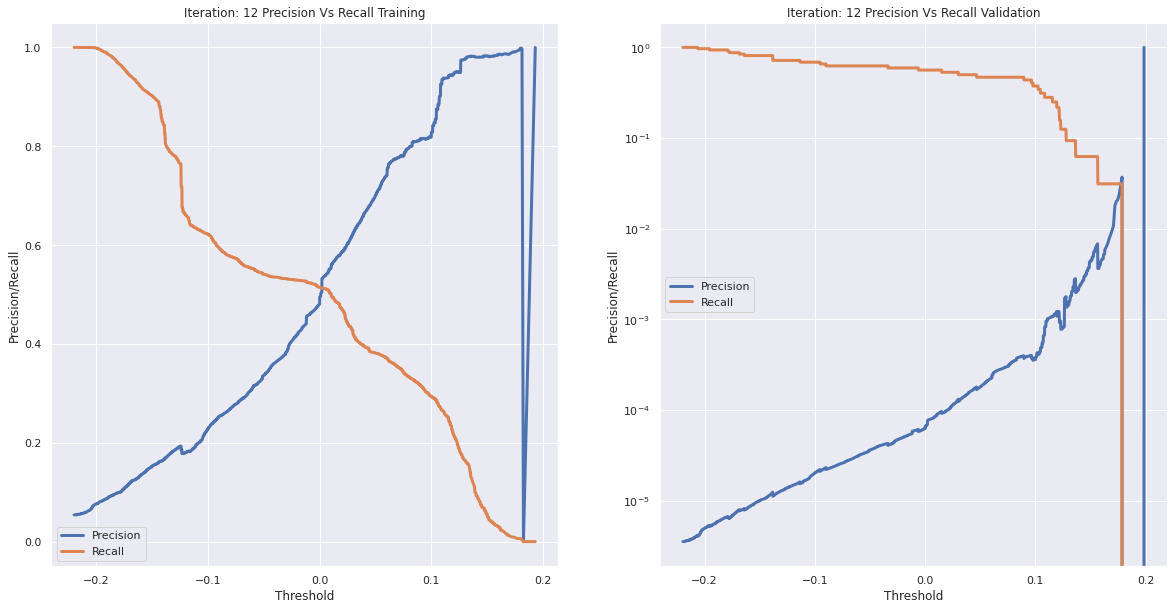

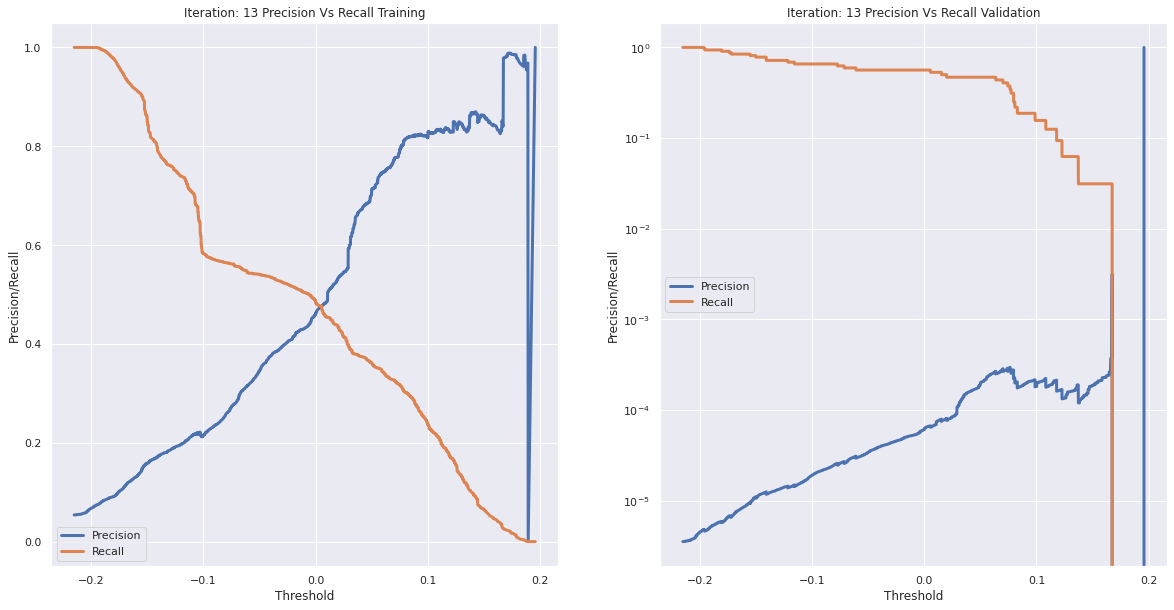

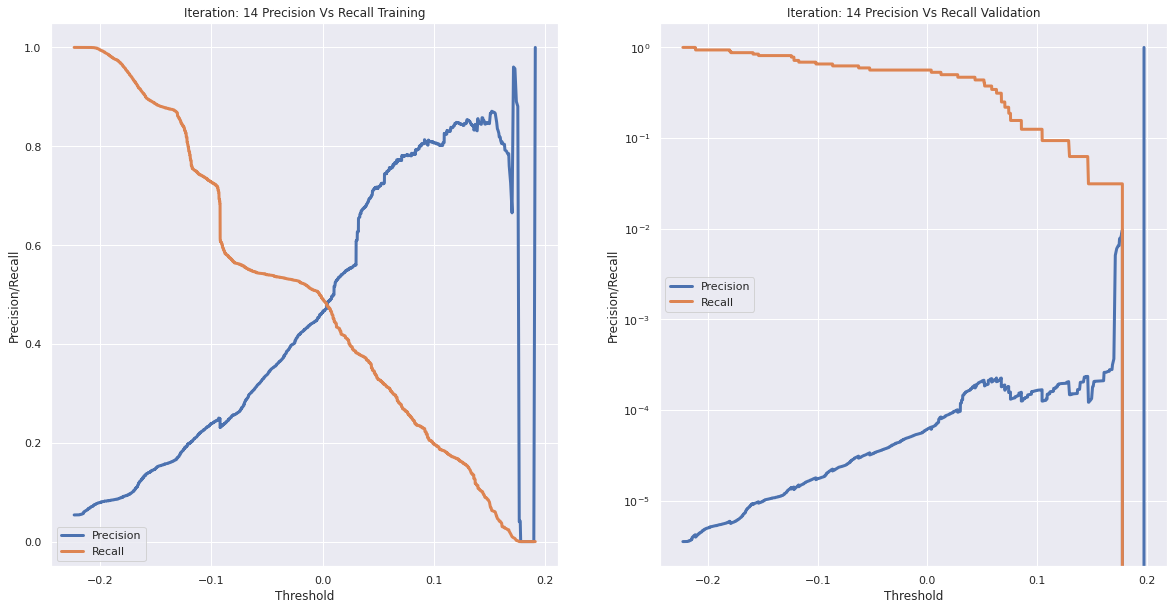

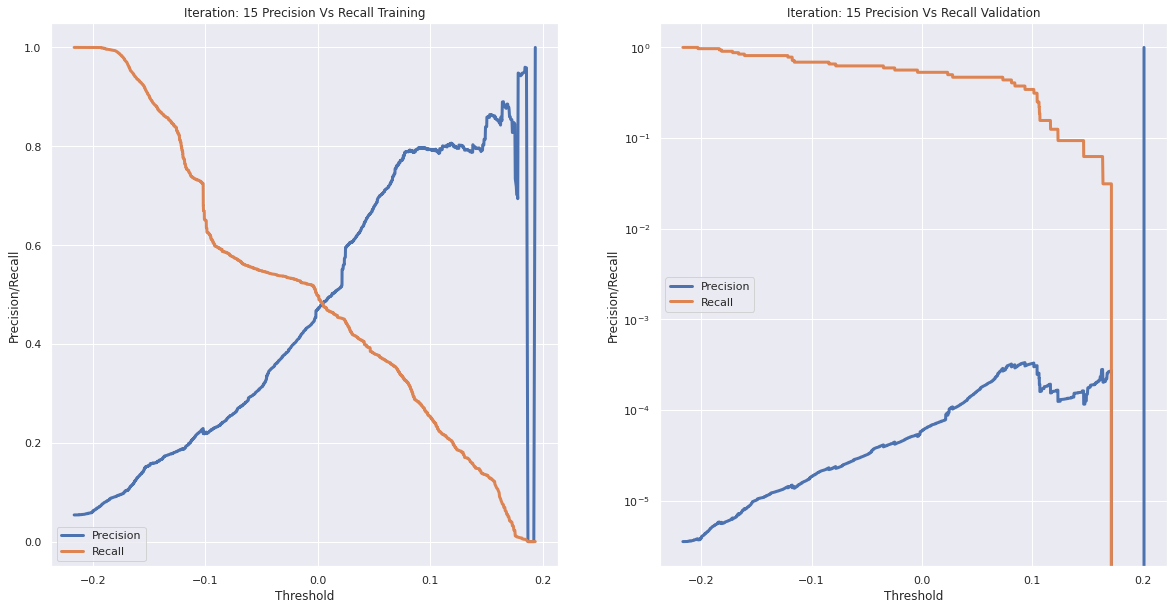

In [34]:
# # Precision and recall graphs--- delete if not req
# for it in iterations:
#     precision_rt = eval_train[it]['precision_rt']
#     recall_rt = eval_train[it]['recall_rt']
#     threshold_rate = eval_train[it]['threshold_rt']

#     f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

#     ax1.plot(threshold_rate, precision_rt[1:], label="Precision",linewidth=3)
#     ax1.plot(threshold_rate, recall_rt[1:], label="Recall",linewidth=3)
#     #     ax1.set_yscale('log')
#     ax1.legend()
#     ax1.set_title('Iteration: '+ str(it) +' Precision Vs Recall Training')
#     ax1.set_ylabel('Precision/Recall')
#     ax1.set_xlabel('Threshold')


#     precision_rt = eval_test[it]['precision_rt']
#     recall_rt = eval_test[it]['recall_rt']
#     threshold_rate = eval_test[it]['threshold_rt']
#     ax2.plot(threshold_rate, precision_rt[1:], label="Precision",linewidth=3)
#     ax2.plot(threshold_rate, recall_rt[1:], label="Recall",linewidth=3)
#     ax2.legend()
#     ax2.set_yscale('log')
#     ax2.set_title('Iteration: '+ str(it) +' Precision Vs Recall Validation')
#     ax2.set_ylabel('Precision/Recall')
#     ax2.set_xlabel('Threshold')

Confusion Matrix

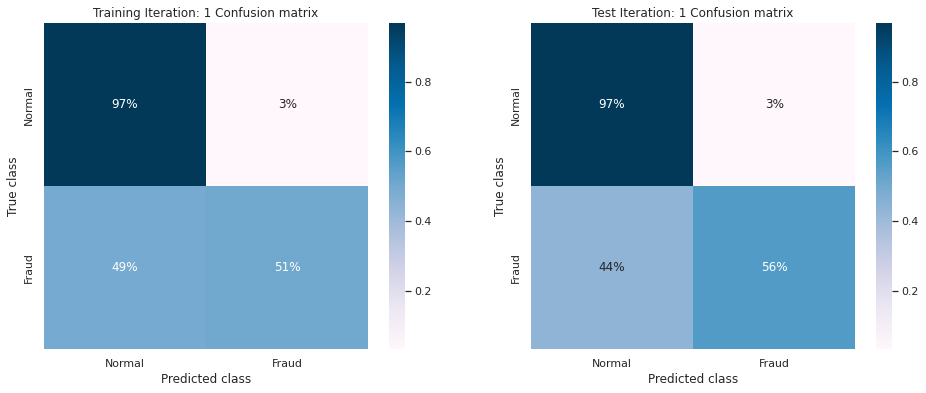

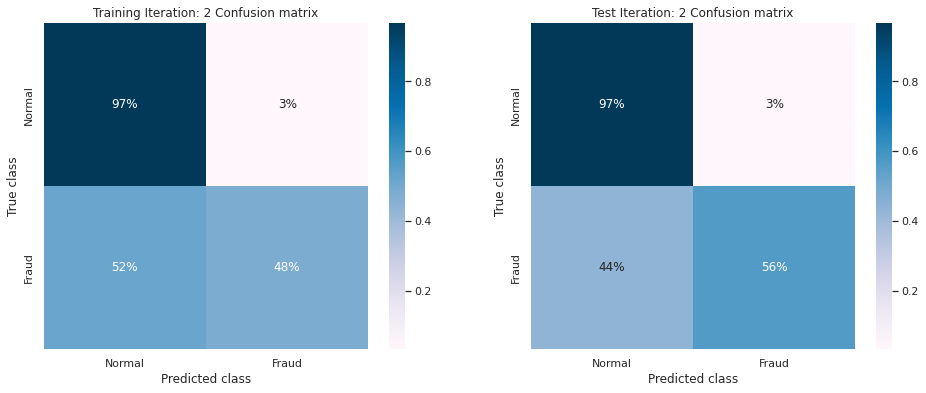

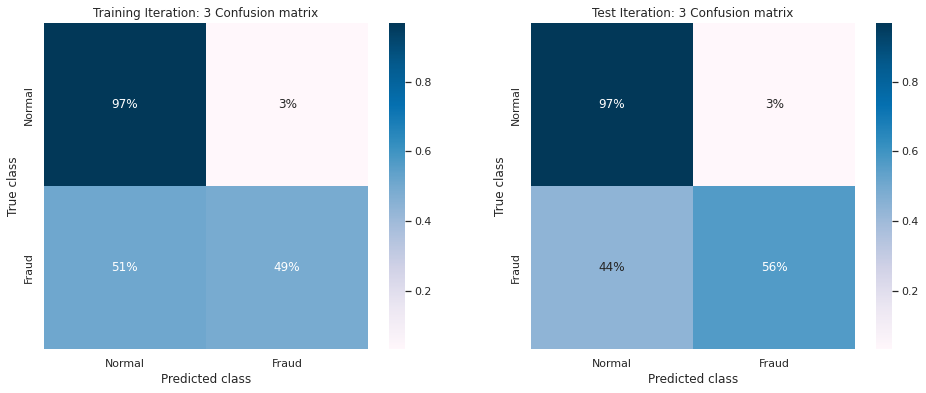

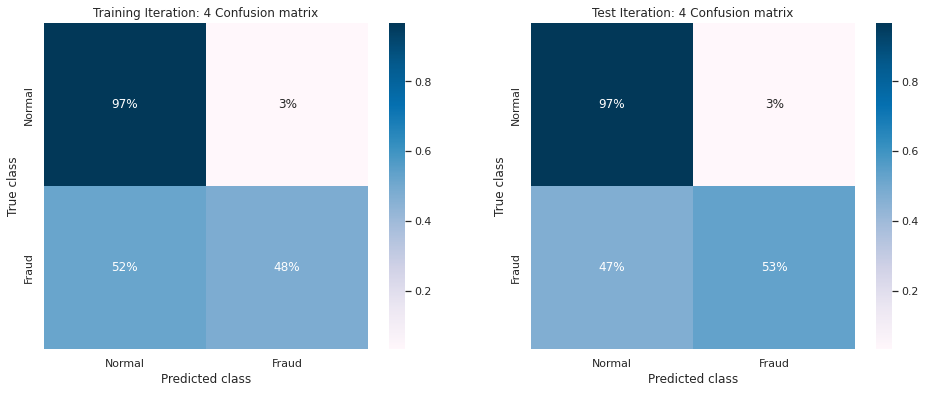

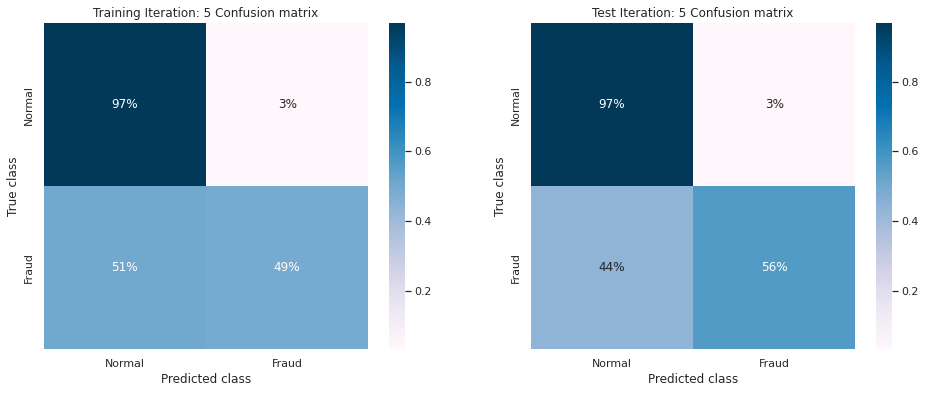

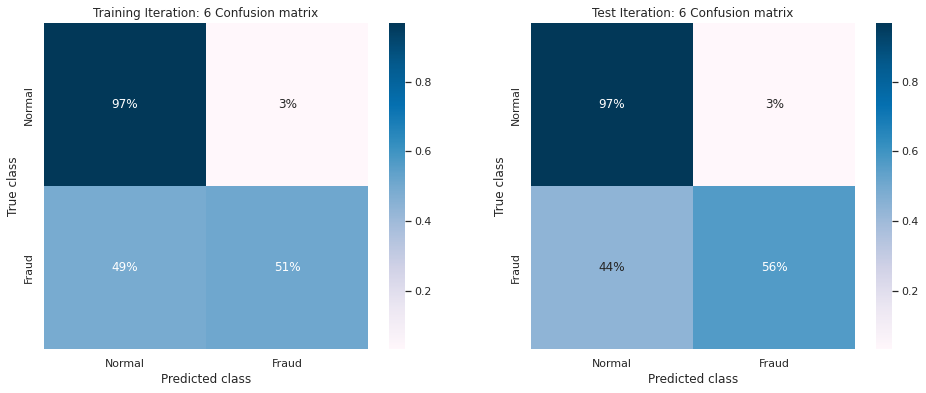

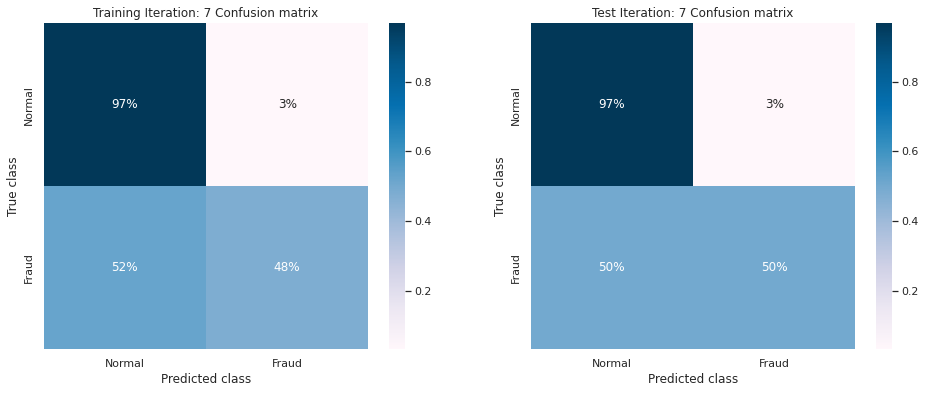

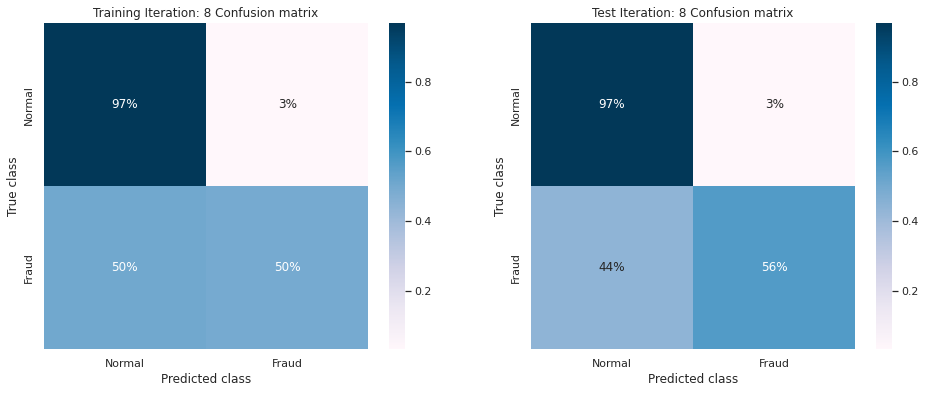

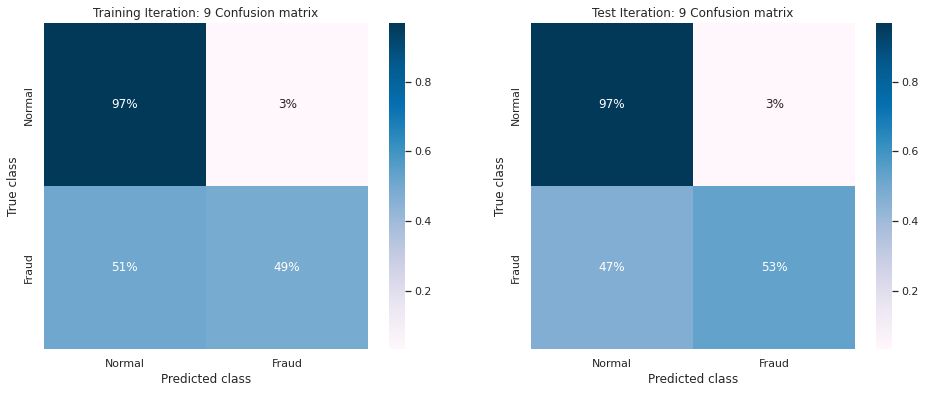

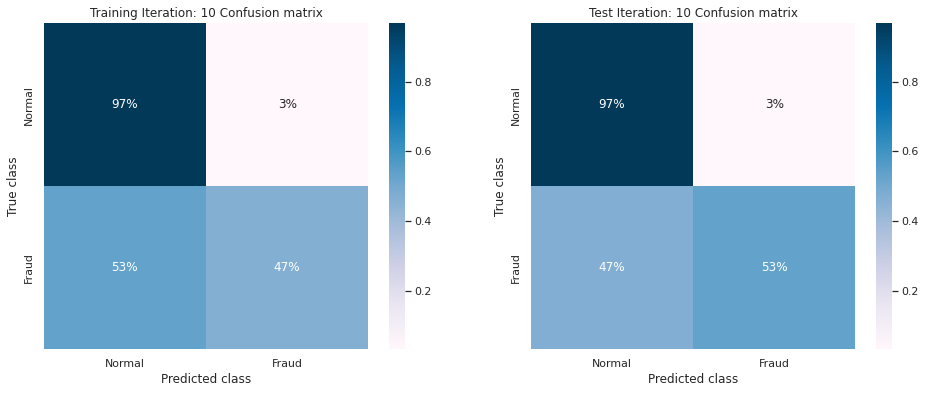

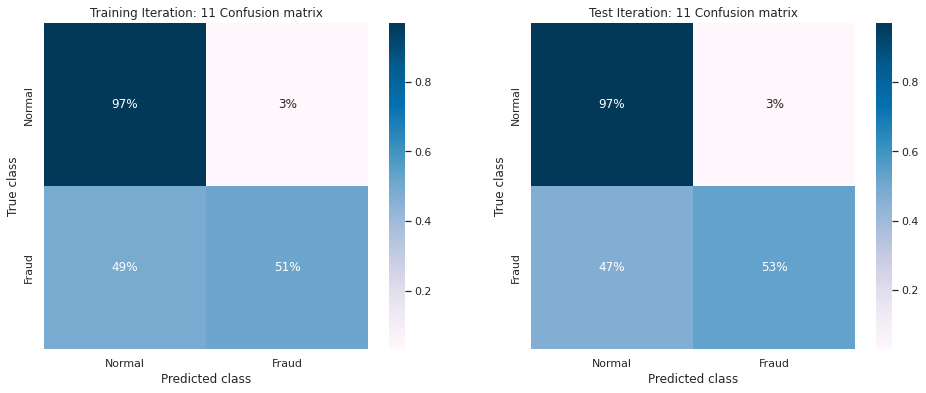

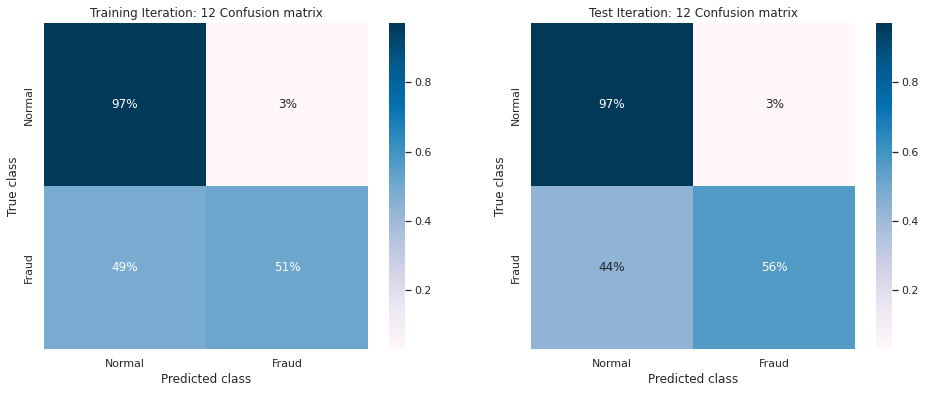

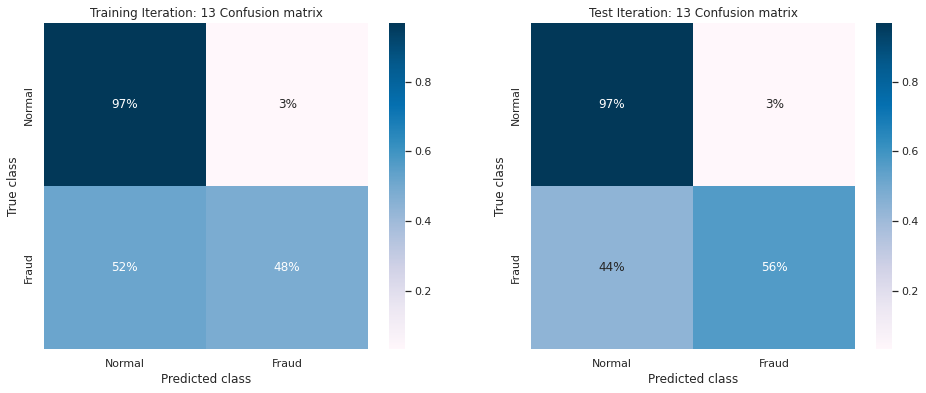

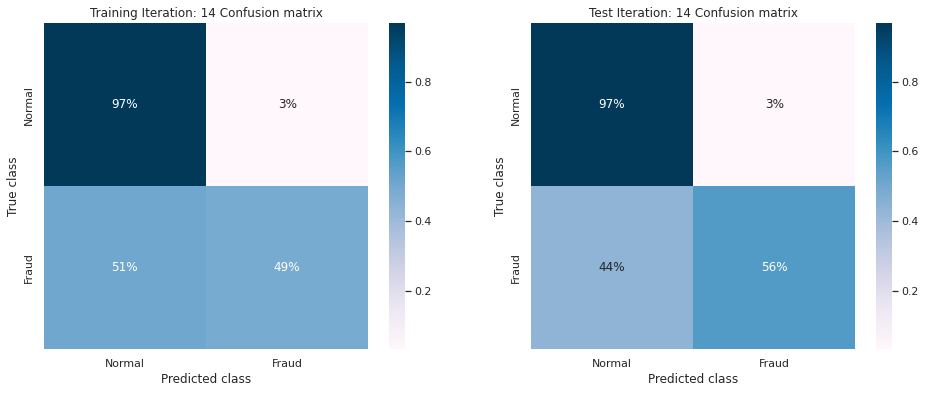

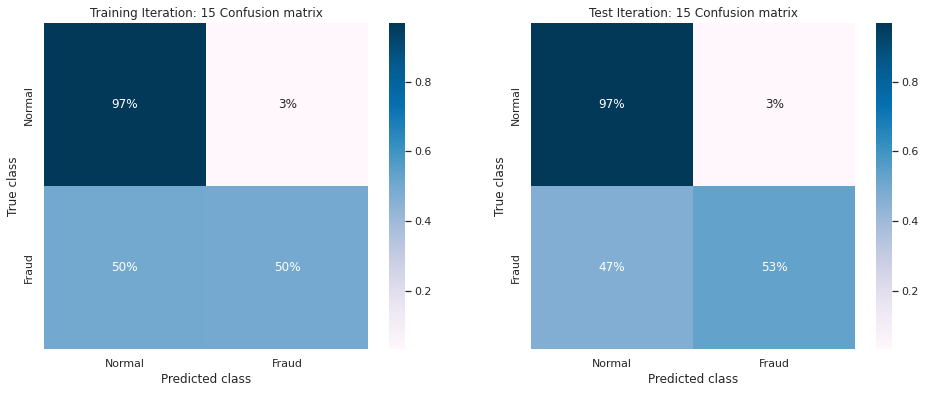

In [36]:
def conf_matrix_percent(conf_matrix_train, conf_matrix_test, iteration):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    LABELS = ["Normal", "Fraud"]
    #Confusion Matrix Visual)
    conf_matrix_train = conf_matrix_train.astype('float') / (conf_matrix_train.sum(axis=1)[:, np.newaxis])
    sns.heatmap(conf_matrix_train, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt=".0%", annot_kws={"size": 12}, ax=ax1, cmap="PuBu")
    ax1.set_title("Training Iteration: "+str(iteration)+" Confusion matrix")
    ax1.set_ylabel('True class')
    ax1.set_xlabel('Predicted class')

    conf_matrix_test = conf_matrix_test.astype('float') / (conf_matrix_test.sum(axis=1)[:, np.newaxis])
    sns.heatmap(conf_matrix_test, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt=".0%", annot_kws={"size": 12}, ax=ax2, cmap="PuBu")
    ax2.set_title("Test Iteration: "+str(iteration)+" Confusion matrix")
    ax2.set_ylabel('True class')
    ax2.set_xlabel('Predicted class')


for it in iterations:
    cnf_mtx_train = eval_train[it]['conf_matrix']
    cnf_mtx_test = eval_test[it]['conf_matrix']
    conf_matrix_percent(cnf_mtx_train, cnf_mtx_test, it)

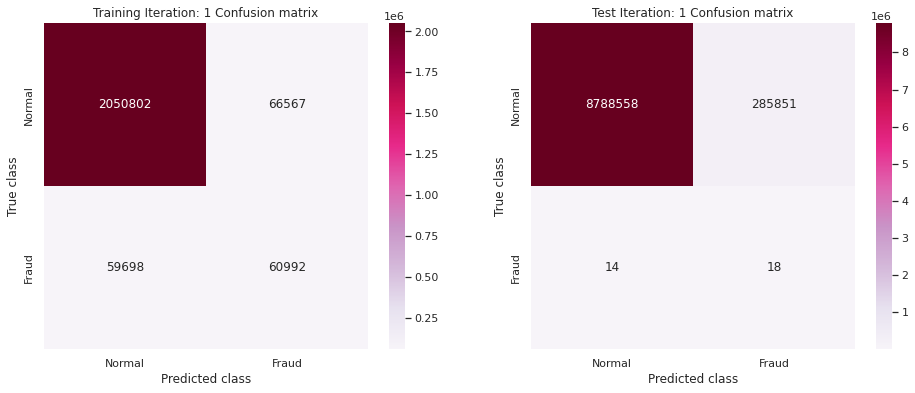

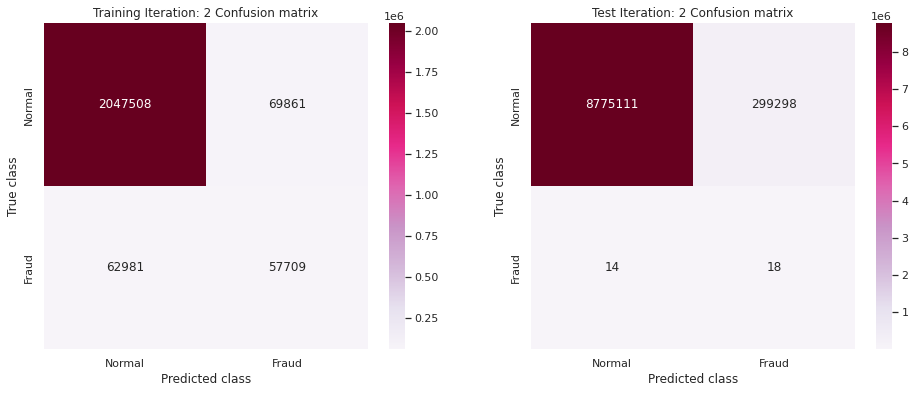

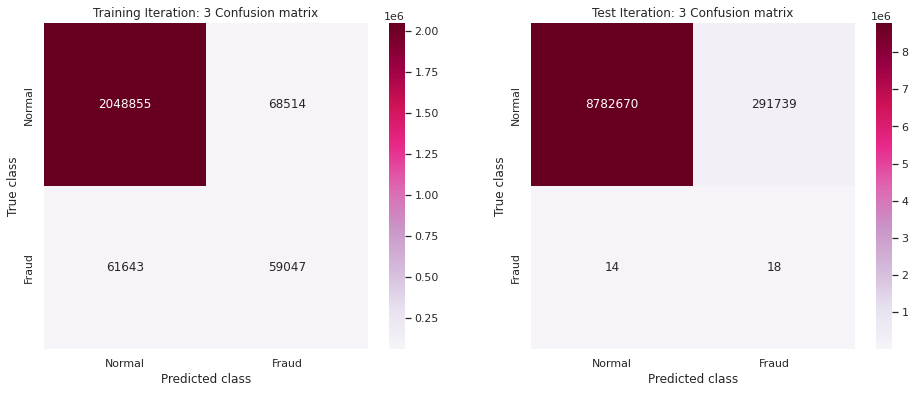

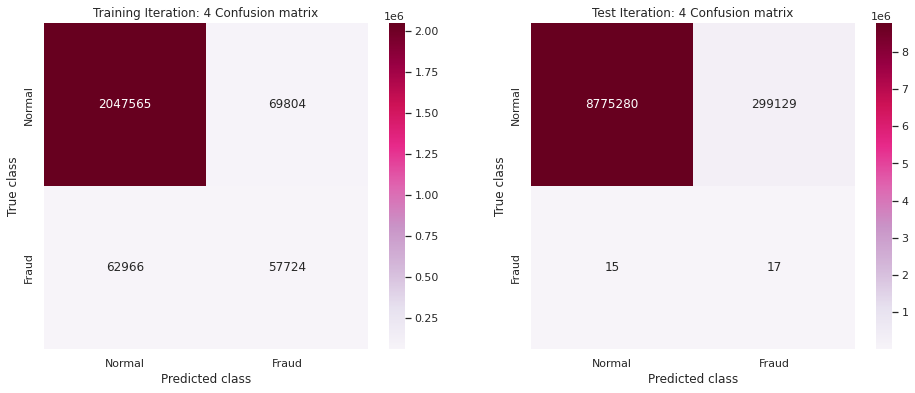

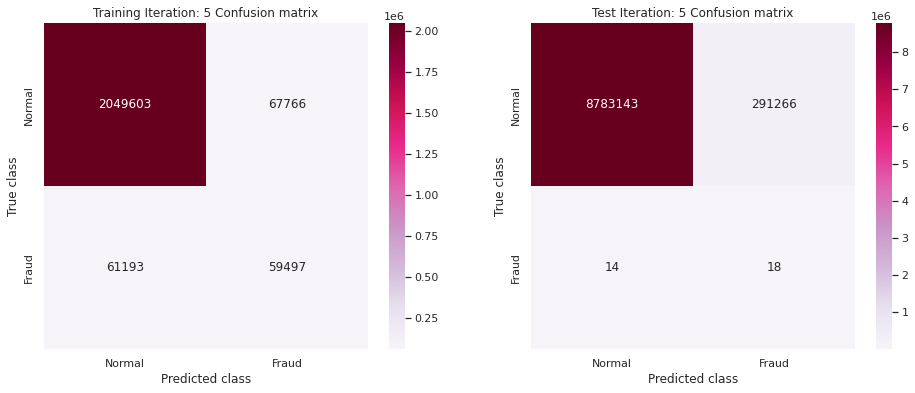

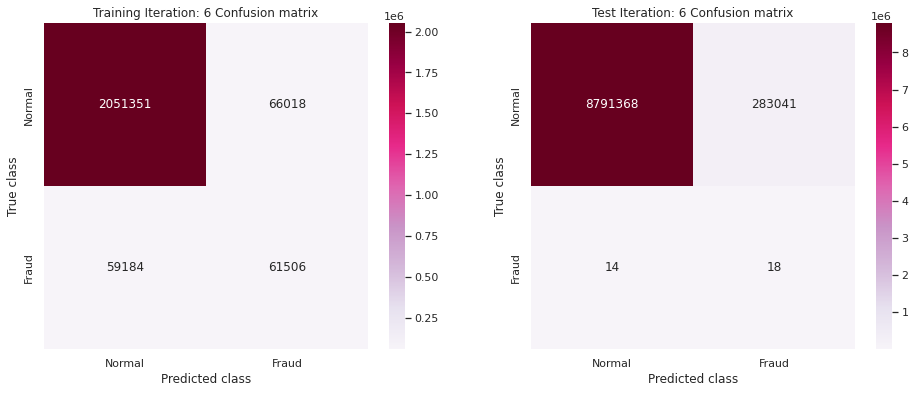

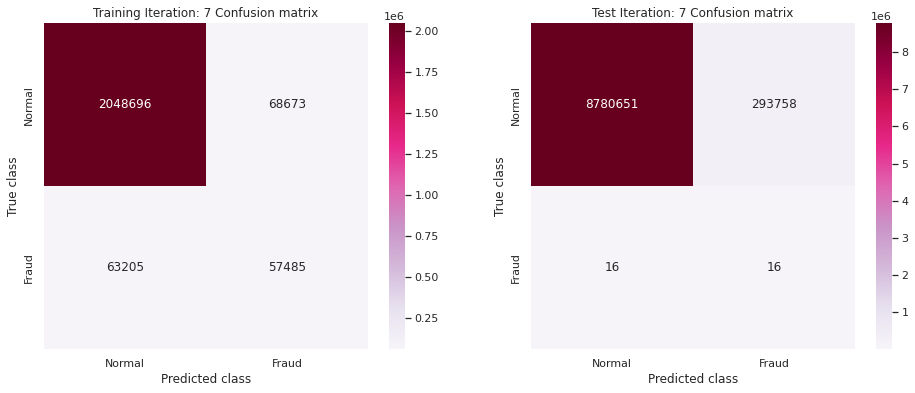

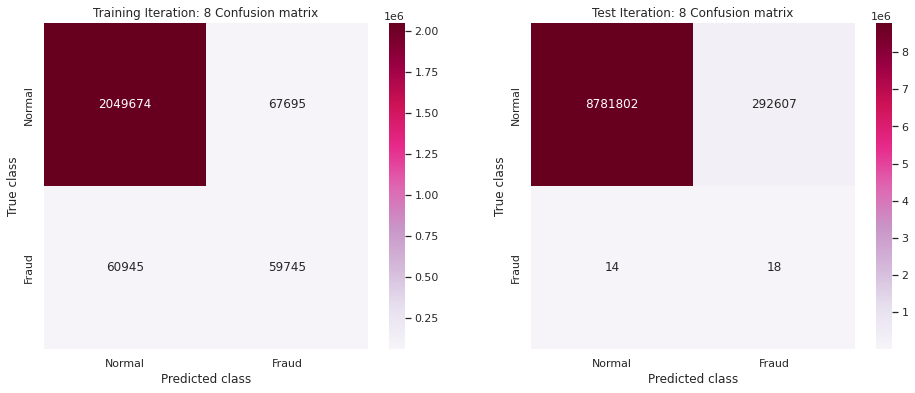

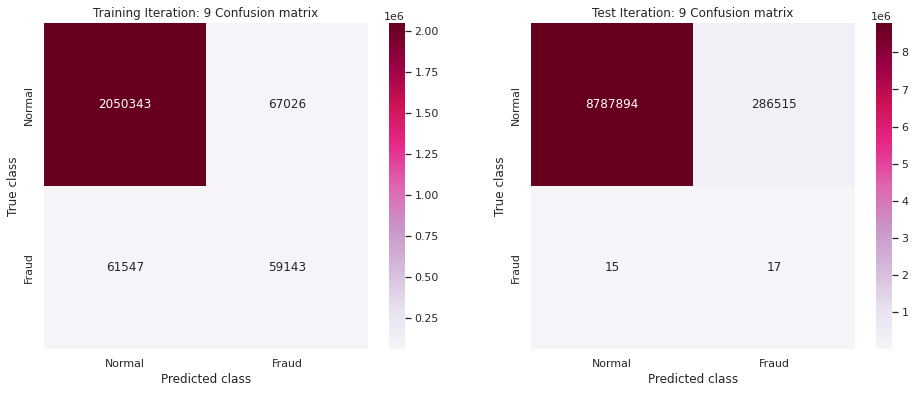

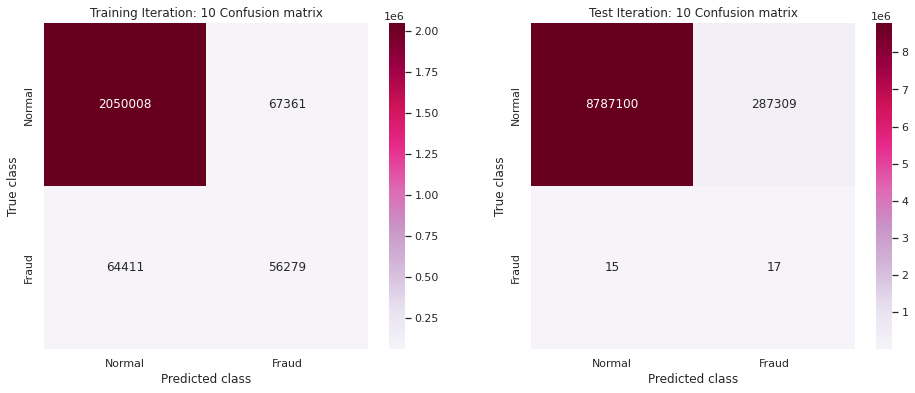

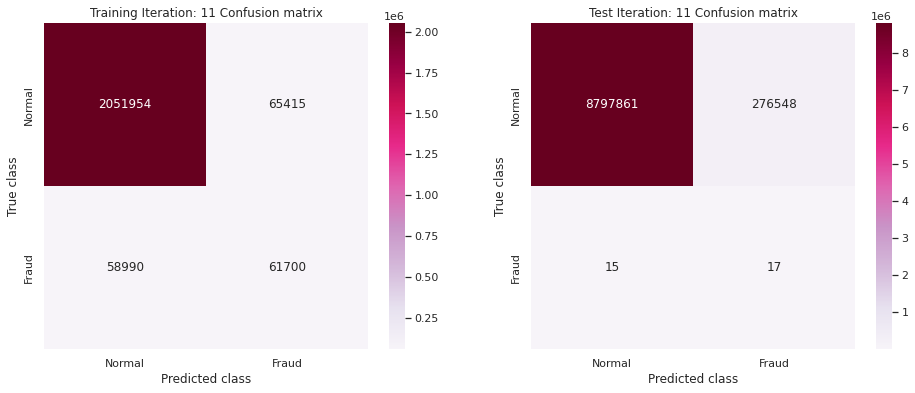

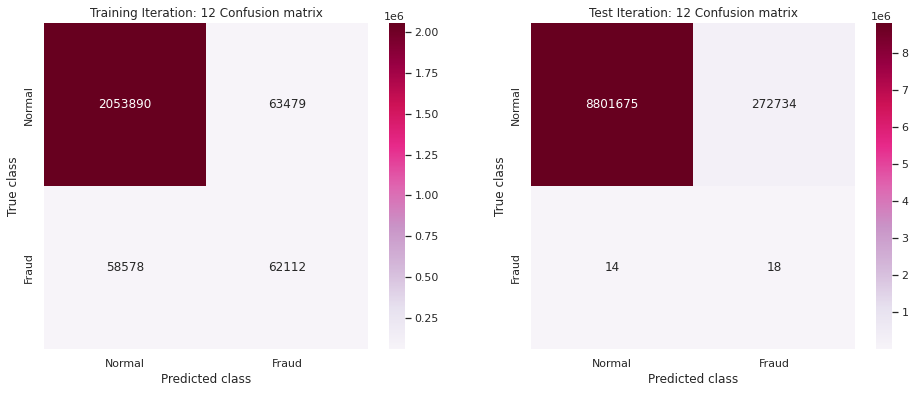

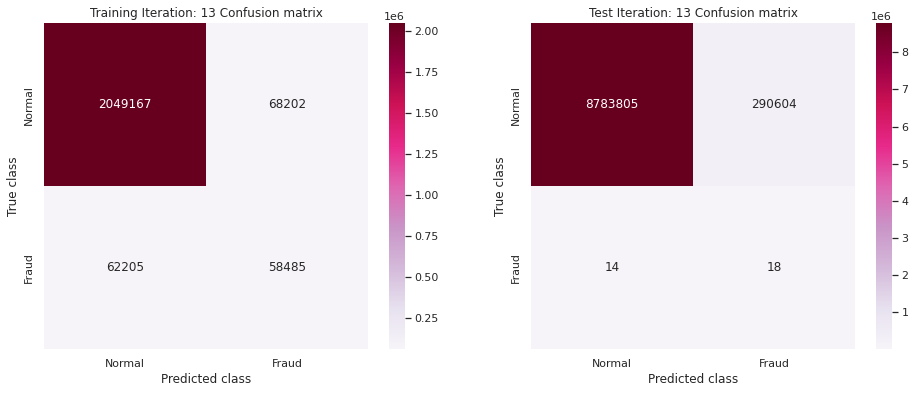

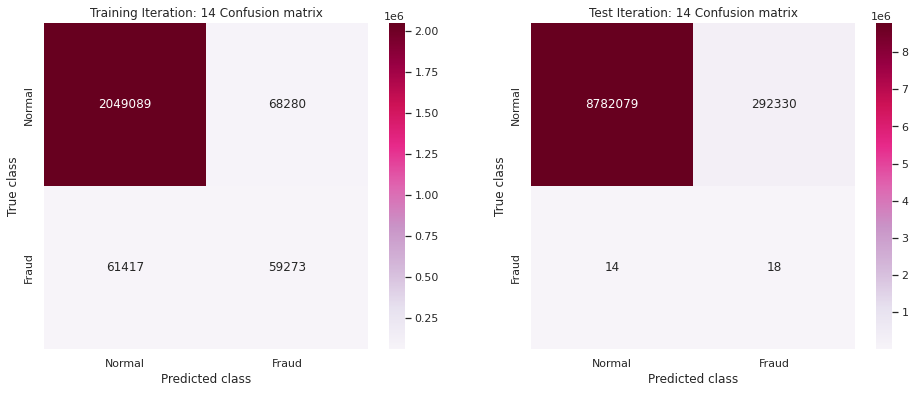

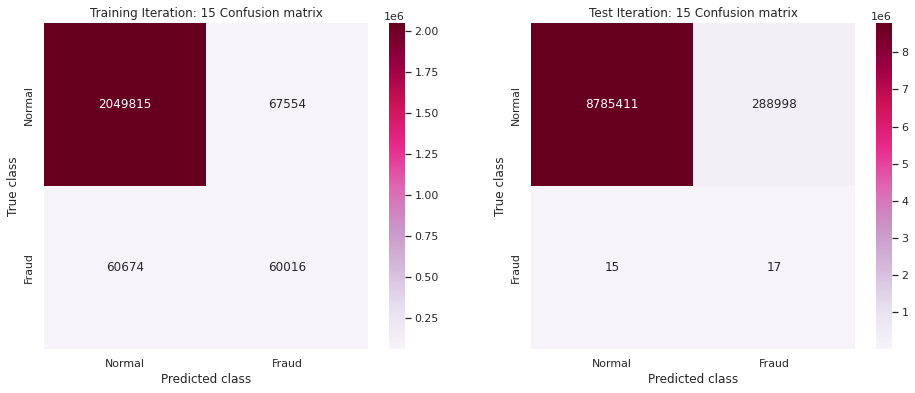

In [37]:
def conf_matrix_normal(conf_matrix_train, conf_matrix_test, iteration):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    LABELS = ["Normal", "Fraud"]

    sns.heatmap(conf_matrix_train, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", ax=ax1, cmap="PuRd");
    ax1.set_title("Training Iteration: "+str(iteration)+" Confusion matrix")
    ax1.set_ylabel('True class')
    ax1.set_xlabel('Predicted class')


    sns.heatmap(conf_matrix_test, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", ax=ax2, cmap="PuRd");
    ax2.set_title("Test Iteration: "+str(iteration)+" Confusion matrix")
    ax2.set_ylabel('True class')
    ax2.set_xlabel('Predicted class')


for it in iterations:
    cnf_mtx_train = eval_train[it]['conf_matrix']
    cnf_mtx_test = eval_test[it]['conf_matrix']
    conf_matrix_normal(cnf_mtx_train, cnf_mtx_test, it)